In [ ]:
!!pip install levenshtein

['Requirement already satisfied: levenshtein in /root/venv/lib/python3.9/site-packages (0.23.0)',
 'Requirement already satisfied: rapidfuzz<4.0.0,>=3.1.0 in /root/venv/lib/python3.9/site-packages (from levenshtein) (3.6.1)',
 '',
 '[notice] A new release of pip is available: 23.0.1 -> 23.3.2',
 '[notice] To update, run: pip install --upgrade pip']

In [ ]:
!!pip3 install fuzzywuzzy

['Requirement already satisfied: fuzzywuzzy in /root/venv/lib/python3.9/site-packages (0.18.0)',
 '',
 '[notice] A new release of pip is available: 23.0.1 -> 23.3.2',
 '[notice] To update, run: pip install --upgrade pip']

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import collections
import json
import itertools

In [ ]:
df= pd.read_csv("/work/weight.csv",index_col=0)

In [ ]:
column_names = df.columns


print("Nomi delle colonne nel DataFrame:")
for column in column_names:
    print(column)

Nomi delle colonne nel DataFrame:
Source
Target
Weight


In [ ]:
G=nx.Graph()
for _, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    G.add_node(source)
    G.add_node(target)
    
    G.add_edge(source, target, weight=weight)
    

In [ ]:
G_sample = nx.DiGraph()

In [ ]:
#modello di configurazione nel nostro caso indiretto 
degree_sequence = [d for n, d in G.degree()]
cm = nx.configuration_model(degree_sequence, create_using=nx.Graph())

In [ ]:
# Parametri per il modello Watts-Strogatz
num_nodes = len (G.nodes)
k = 4  # Grado dei nodi iniziale
p = 0.3  # Probabilità di riconnessione degli archi

# Creazione di un grafo indiretto Watts-Strogatz
ws = nx.connected_watts_strogatz_graph(num_nodes, k, p)


In [ ]:
er = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), directed= False) #Erdős-Rényi graph

In [ ]:
ba = nx.barabasi_albert_graph(G.number_of_nodes(), 4) #Barabási–Albert graph

### Degree Centrality

In [ ]:
from operator import itemgetter

In [ ]:
real_world_degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, real_world_degree_dict, 'degree')
real_world_degree_list = sorted(real_world_degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in real_world_degree_list[:20]:
    print(d)

Top 20 nodes by degree:
('SAKO YOICHIRO', 133)
('CHENG KANGGUO', 129)
('BEWLAY BERNARD PATRICK', 123)
('KONDO TETSUJIRO', 118)
('KUMAR AJITH KUTTANNAIR', 116)
('SATO HIROSHI', 115)
('TURNQUIST NORMAN ARNOLD', 101)
('IKEDA MASAMI', 100)
('MCCLOSKEY PATRICK JOSEPH', 95)
('LEE CHING-PANG', 91)
('SUGAMA SADAYUKI', 91)
('ISHINAGA HIROYUKI', 89)
('LEWIS LARRY NEIL', 87)
('HERSHEY JOHN ERIK', 87)
('KASHINO TOSHIO', 87)
('YAMAMOTO AKIRA', 87)
('KARITA SEIICHIRO', 85)
('HIRABAYASHI HIROMITSU', 84)
('GLYNN CHRISTOPHER CHARLES', 82)
('KRAY NICHOLAS JOSEPH', 78)


In [ ]:
degree_centrality = dict(nx.degree(G))

# Lista di tuple 
degree_sequence = [(node, degree) for node, degree in degree_centrality.items()]


In [ ]:
dict(itertools.islice(degree_centrality.items(), 10))

{'HENDERSON BRIAN LESLIE': 6,
 'CUI YAN': 41,
 'DORRIETY DANIEL JAMES': 8,
 'SHUBERT GARY CHARLES': 4,
 'COOK PAUL ALBERT': 4,
 'BRUNELLE DANIEL JOSEPH': 58,
 'PHELPS PETER DAVID': 11,
 'BODEN EUGENE PAULING': 52,
 'NELSON MARK ERIK': 11,
 'FLOWERS LARRY IVIS': 11}

In [ ]:
real_world_degree_list = list(degree_centrality.values())

In [ ]:
print("Lunghezza di degree_list:", len(real_world_degree_list))

Lunghezza di degree_list: 13619


In [ ]:
import itertools

degree_centrality = {
    'HENDERSON BRIAN LESLIE': 6,
    'CUI YAN': 41,
    'DORRIETY DANIEL JAMES': 8,
    'SHUBERT GARY CHARLES': 4,
    'COOK PAUL ALBERT': 4,
    'BRUNELLE DANIEL JOSEPH': 58,
    'PHELPS PETER DAVID': 11,
    'BODEN EUGENE PAULING': 52,
    'NELSON MARK ERIK': 11,
    'FLOWERS LARRY IVIS': 11
}

# Primi 10 risultati
degree_list = list(itertools.islice(degree_centrality.items(), 10))

print(degree_list)


[('HENDERSON BRIAN LESLIE', 6), ('CUI YAN', 41), ('DORRIETY DANIEL JAMES', 8), ('SHUBERT GARY CHARLES', 4), ('COOK PAUL ALBERT', 4), ('BRUNELLE DANIEL JOSEPH', 58), ('PHELPS PETER DAVID', 11), ('BODEN EUGENE PAULING', 52), ('NELSON MARK ERIK', 11), ('FLOWERS LARRY IVIS', 11)]


In [ ]:
degree_values = [item[1] for item in degree_list]
print(degree_values)


[6, 41, 8, 4, 4, 58, 11, 52, 11, 11]


In [ ]:
print("Lunghezza di degree_list:", len(degree_list))


Lunghezza di degree_list: 10


ER Degree Centrality

In [ ]:
er_degree_dict = dict(er.degree(er.nodes()))
nx.set_node_attributes(er, er_degree_dict, 'degree')
er_degree_list = sorted(er_degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree in the ER model:")
for d in er_degree_list[:20]: 
    print(d)

Top 20 nodes by degree in the ER model:
(3791, 18)
(8415, 18)
(9647, 18)
(4624, 17)
(637, 16)
(1047, 16)
(1139, 16)
(1142, 16)
(2059, 16)
(2078, 16)
(2500, 16)
(3459, 16)
(3748, 16)
(4057, 16)
(4690, 16)
(4967, 16)
(5184, 16)
(7448, 16)
(8490, 16)
(8990, 16)


In [ ]:
ws_degree_sequence = [(n, d)  for n, d in ws.degree()]  # degree sequence
ws_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  
ws_degree_list = [i[1] for i in ws_degree_sequence]

In [ ]:
ba_degree_sequence = [(n, d)  for n, d in ba.degree()]  # degree sequence
ba_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  
ba_degree_list = [i[1] for i in ba_degree_sequence]

In [ ]:
cm_degree_sequence = [(n, d) for n, d in G.degree()]  # degree sequence
cm_degree_sequence.sort(key=lambda tup: tup[1], reverse=True)  
cm_degree_list = [i[1] for i in cm_degree_sequence]


In [ ]:
degree_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_degree_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_degree_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_degree_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_degree_list
    }
}
real_world_degree_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_degree_list
    }
}

In [ ]:
def dist_plot(data, title):
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    #plot_list = []
    #labels = []
    for k, v in data.items():
        #plot_list.append(v["list"])
        #labels.append(v["name"])
        sns.distplot(v["list"], label=v["name"], hist=False)
    
    
    #plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel(title, fontsize=fontsize)
    plt.ylabel("Density", fontsize=fontsize)
    plt.title(title + " Density Plot", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel('Models', fontsize=fontsize)
    plt.ylabel(title, fontsize=fontsize)
    plt.title(title+" Box Plot", fontsize=fontsize)
    #plt.title(name + " in 24 hours", fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.yscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Rimuovo bordi
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
#dist_plot(degree_data, "Degree Centrality")

In [ ]:
#dist_plot(real_world_degree_data, "Real World Degree Centrality")

## Connectivity-Based Centrality

### Eigenvector Centrality

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [ ]:
eigenvector_centrality = {k: v for k, v in sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
dict(itertools.islice(eigenvector_centrality.items(), 10))#Top Ten

{'IKEDA MASAMI': 0.23905997679607652,
 'KASHINO TOSHIO': 0.21309139249206688,
 'ISHINAGA HIROYUKI': 0.1855952684799707,
 'KARITA SEIICHIRO': 0.1826070375580896,
 'ABE TSUTOMU': 0.17963667058883706,
 'MASUDA KAZUAKI': 0.16544689229409903,
 'SUGITANI HIROSHI': 0.16367591499983536,
 'SUGAMA SADAYUKI': 0.15578046728416037,
 'KUWABARA NOBUYUKI': 0.15267984635714013,
 'HIRABAYASHI HIROMITSU': 0.13904002754206285}

In [ ]:
real_world_eigenvector_list = list(eigenvector_centrality.values())

In [ ]:
er_eigenvector_centrality = nx.eigenvector_centrality(er)
er_eigenvector_centrality = {k: v for k, v in sorted(er_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
er_eigenvector_list = list(er_eigenvector_centrality.values())

In [ ]:
ws_eigenvector_centrality = nx.eigenvector_centrality(ws, max_iter=1000)  # Imposta un numero di iterazioni più alto
ws_eigenvector_centrality = {k: v for k, v in sorted(ws_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_eigenvector_list = list(ws_eigenvector_centrality.values())

In [ ]:
ba_eigenvector_centrality = nx.eigenvector_centrality(ba)
ba_eigenvector_centrality = {k: v for k, v in sorted(ba_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_eigenvector_list = list(ba_eigenvector_centrality.values())

In [ ]:
cm_eigenvector_centrality = nx.eigenvector_centrality(cm)
cm_eigenvector_centrality = {k: v for k, v in sorted(cm_eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_eigenvector_list = list(cm_eigenvector_centrality.values())

In [ ]:
eigenvector_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_eigenvector_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_eigenvector_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_eigenvector_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_eigenvector_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_eigenvector_list
    }
}
real_world_eigenvector_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_eigenvector_list
    }
}

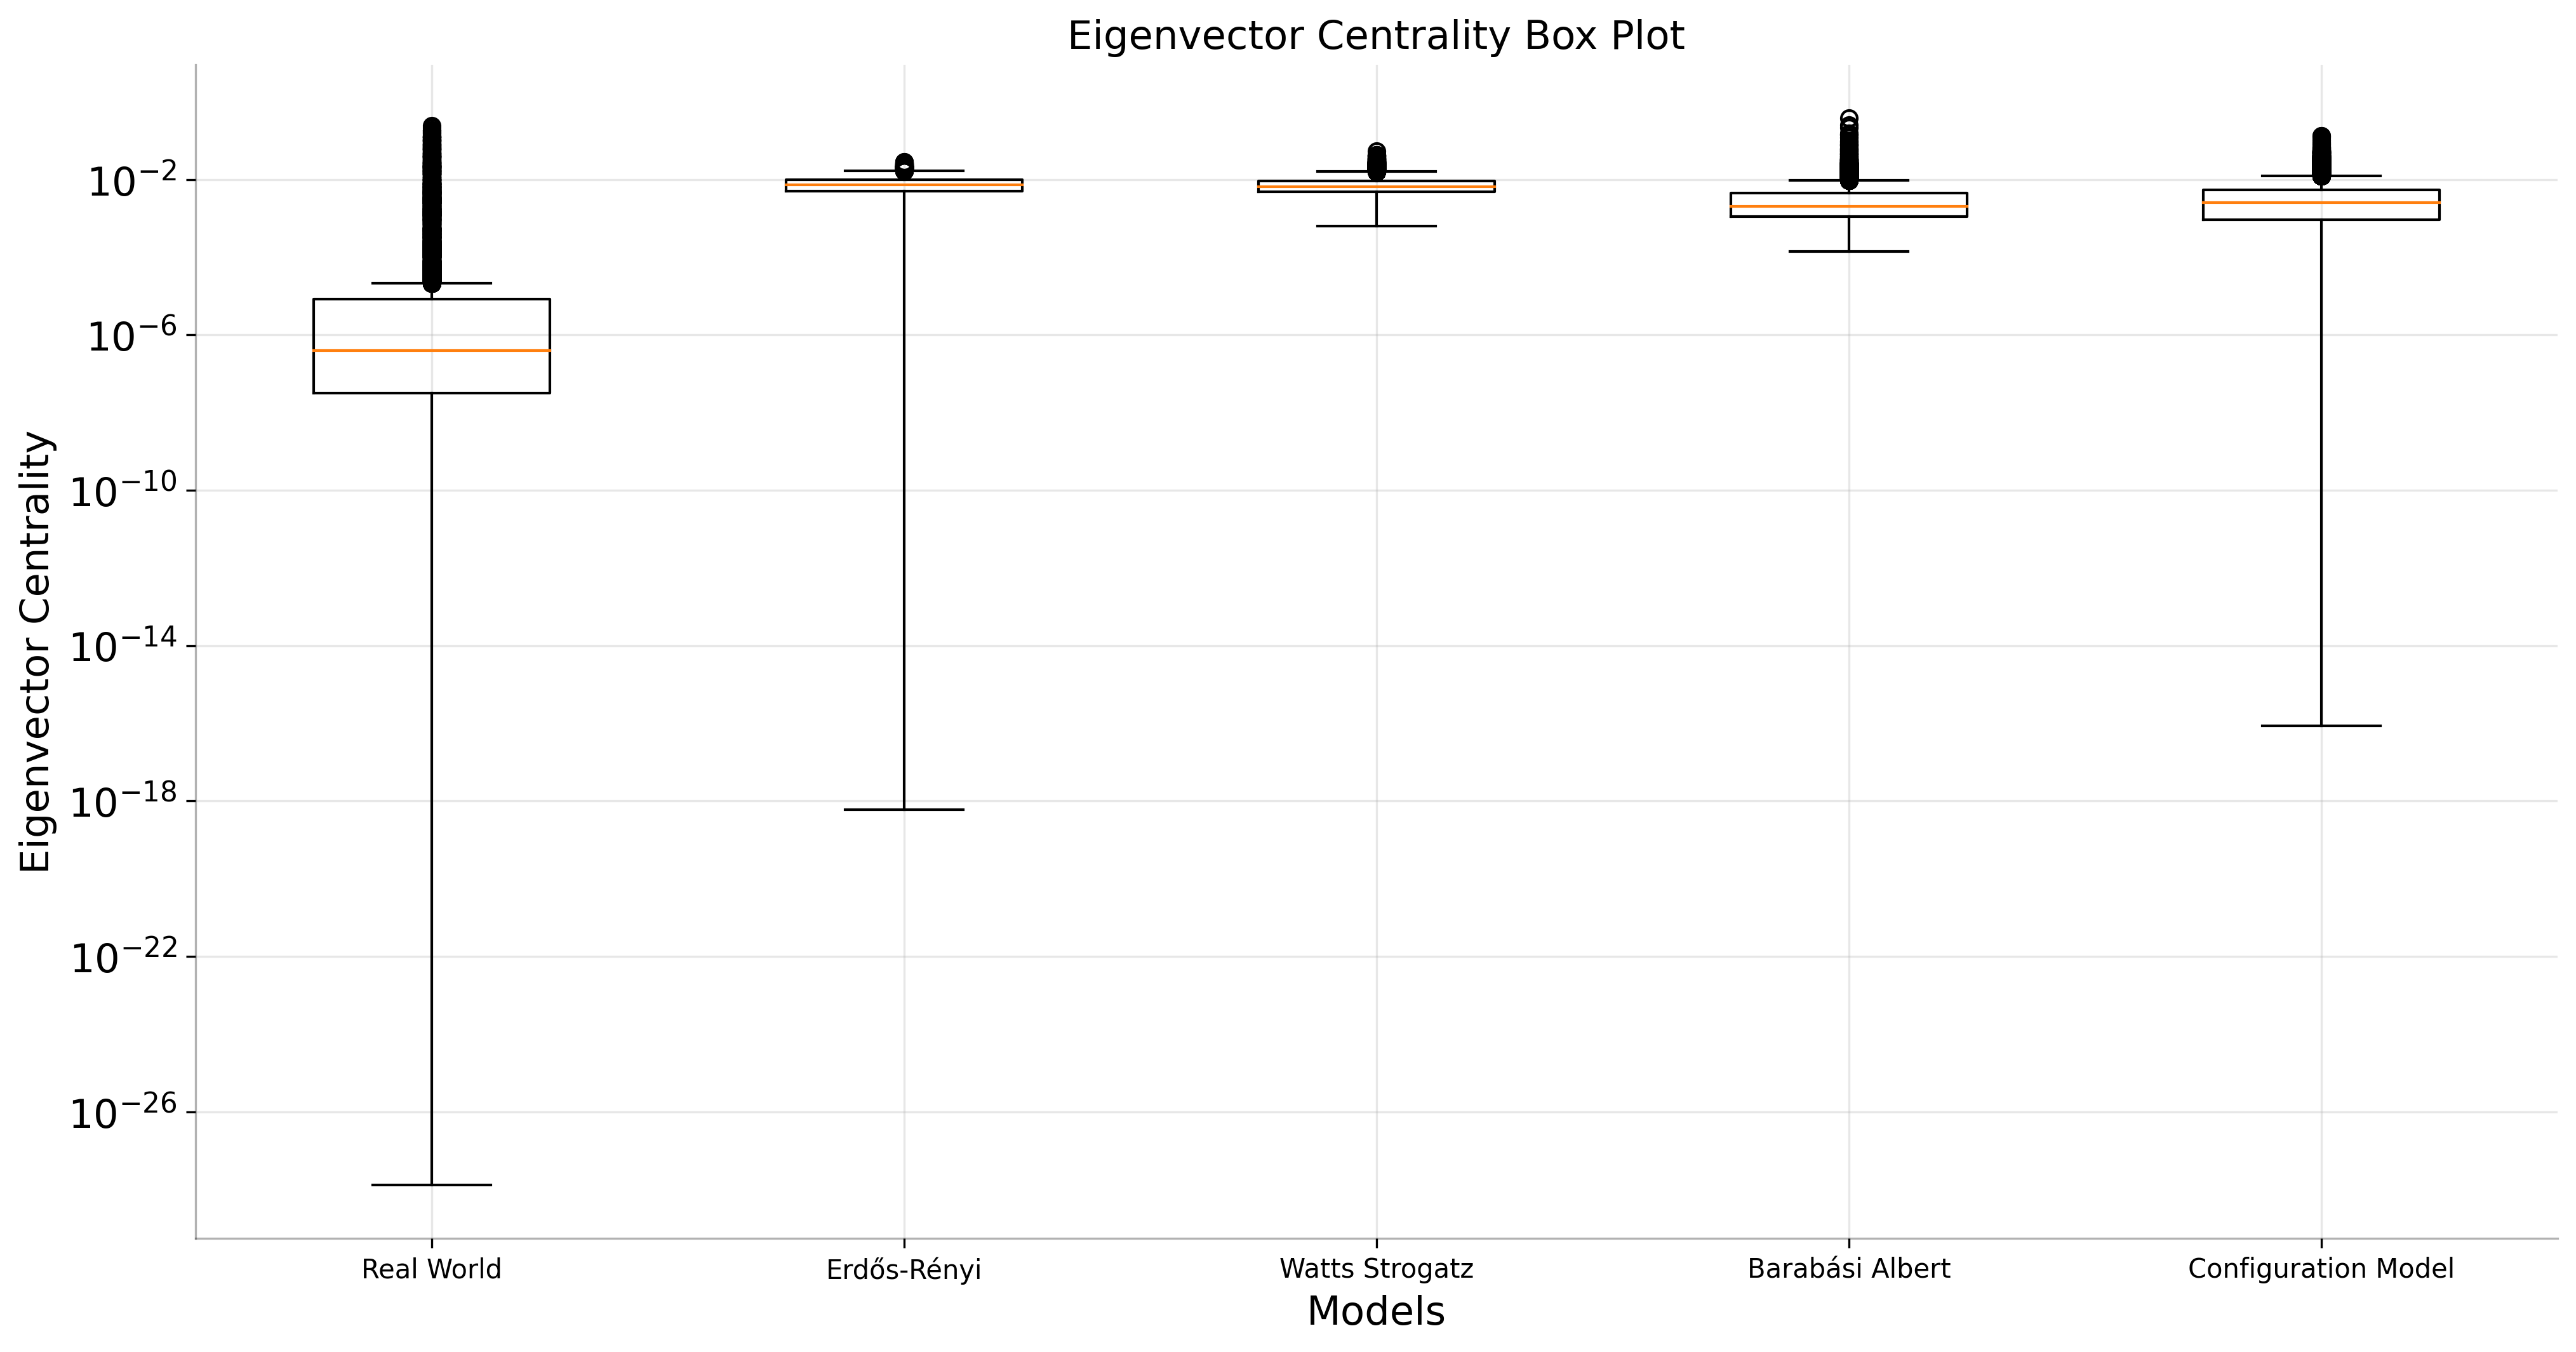

In [ ]:
box_plot(eigenvector_data, "Eigenvector Centrality")

/tmp/ipykernel_205/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_205/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_205/3661112406.py:9

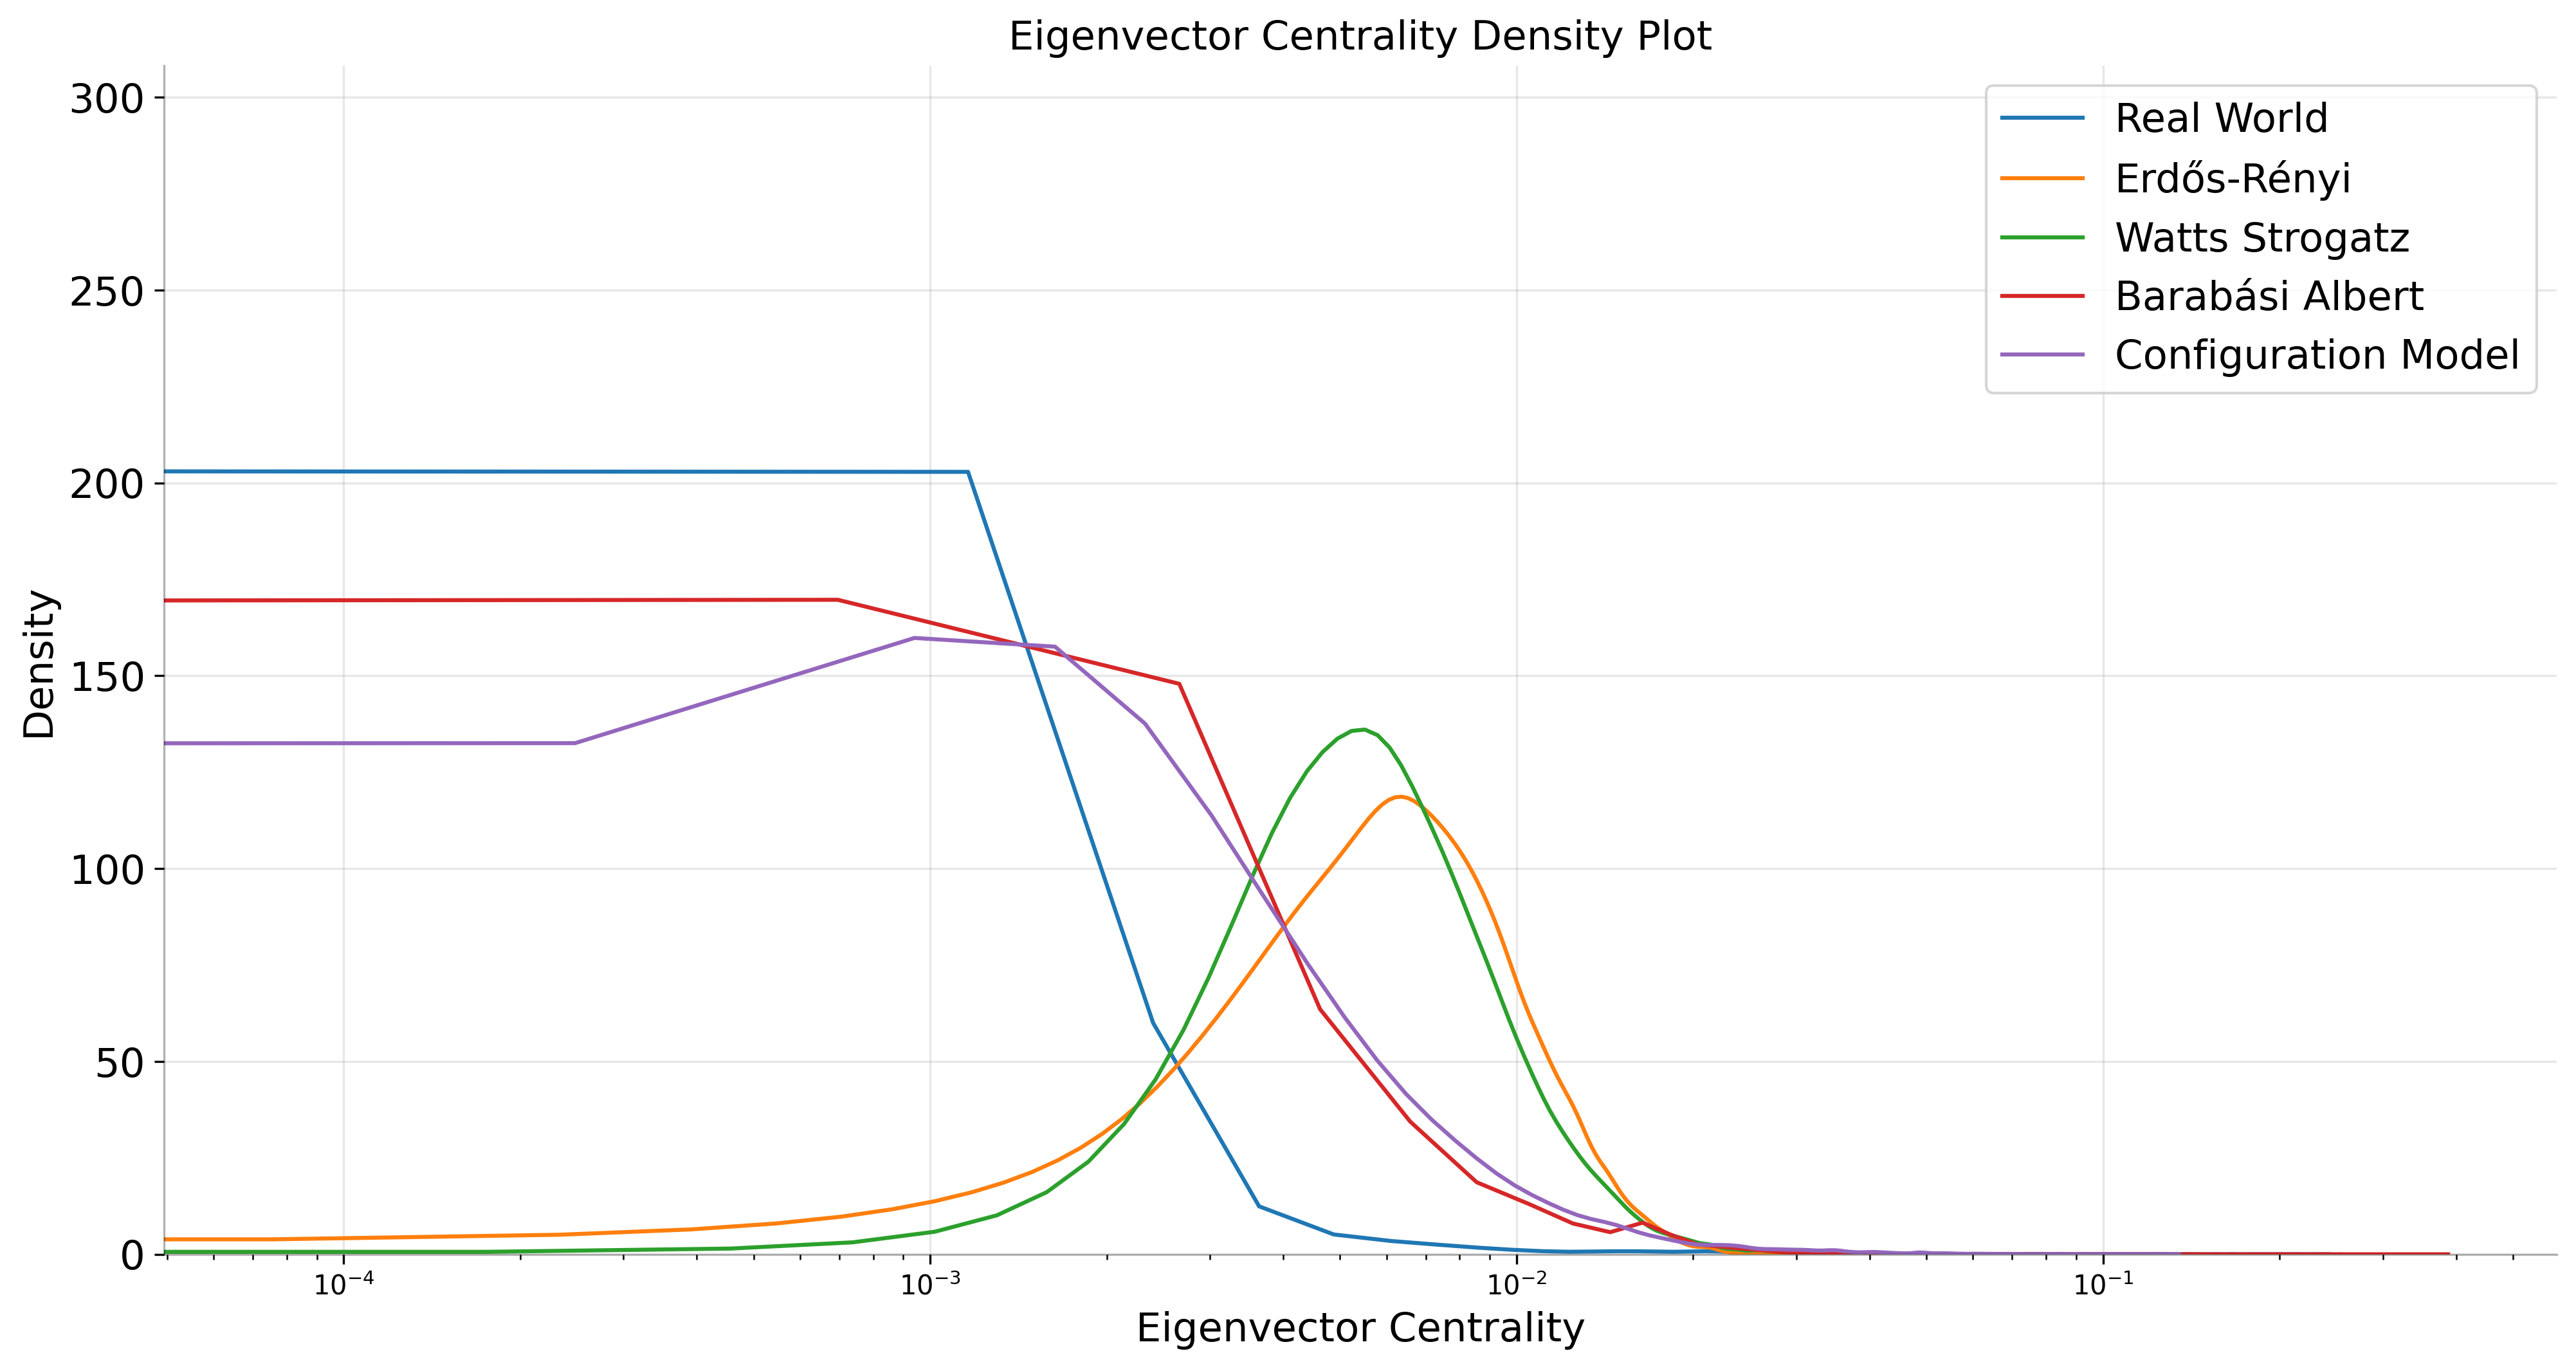

In [ ]:
dist_plot(eigenvector_data, "Eigenvector Centrality")

/tmp/ipykernel_205/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)


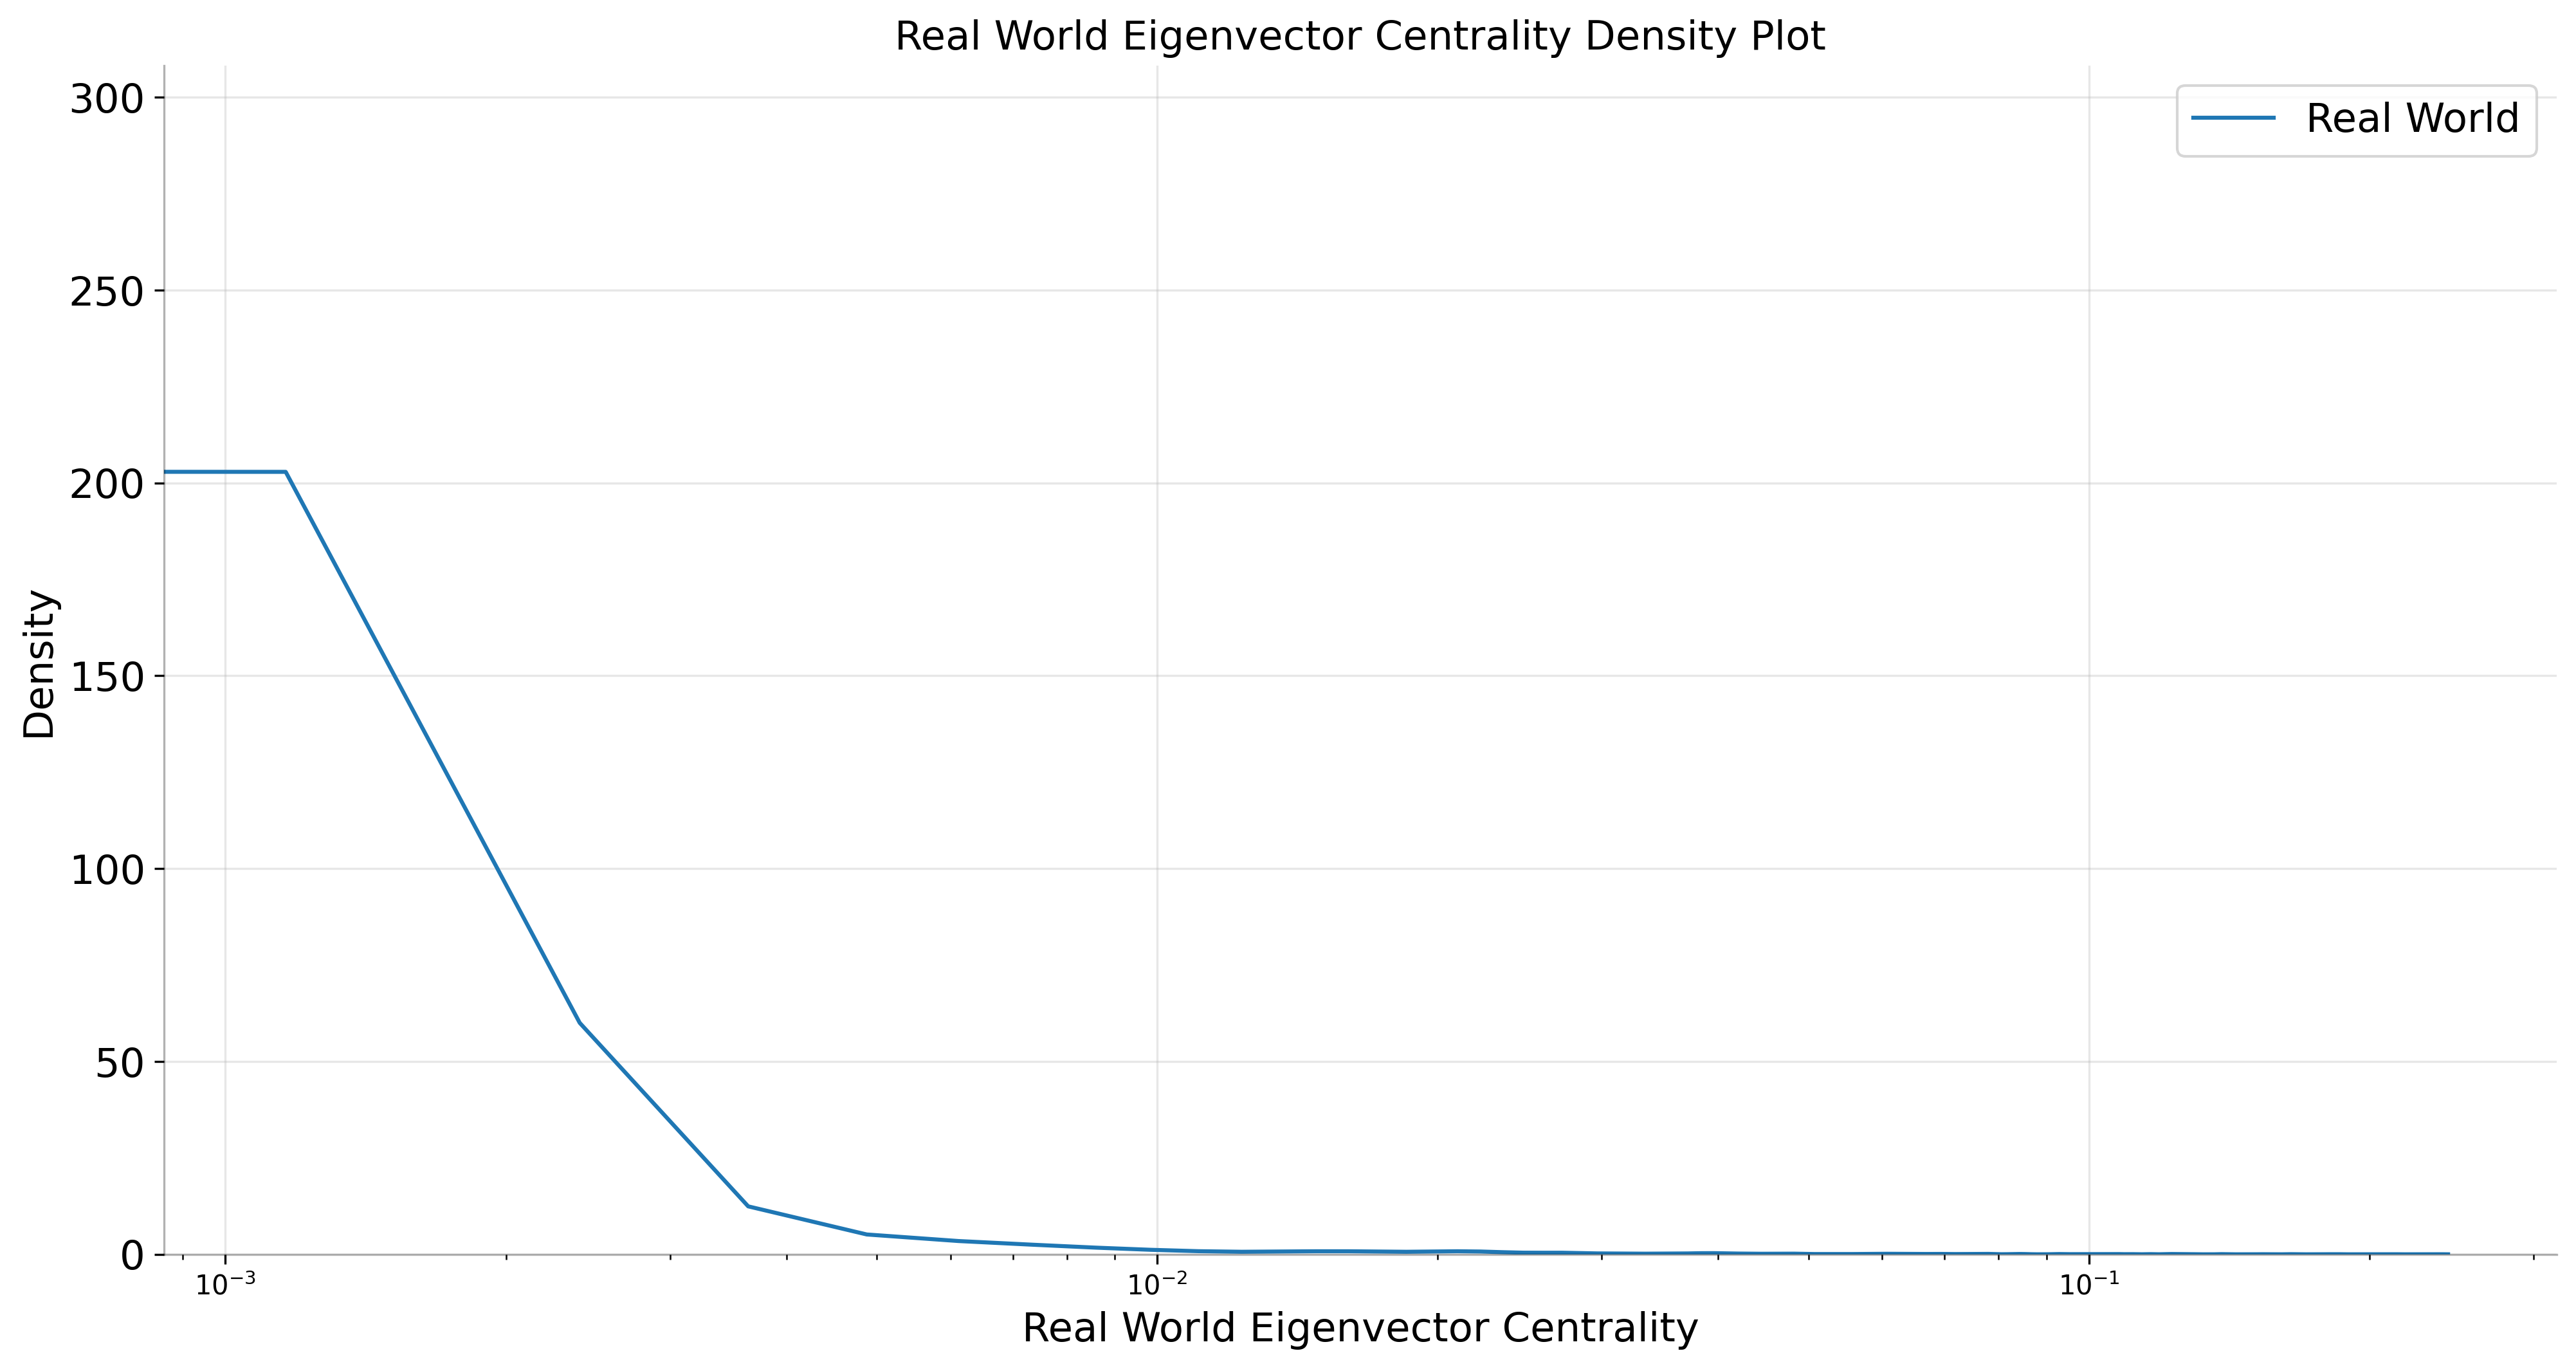

In [ ]:
dist_plot(real_world_eigenvector_data, "Real World Eigenvector Centrality")

### Page Rank Centrality

In [ ]:
page_rank_centrality = nx.pagerank(G, alpha=0.85)

In [ ]:
page_rank_centrality = {k: v for k, v in sorted(page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
dict(itertools.islice(page_rank_centrality.items(), 10))#Top Ten

{'KONDO TETSUJIRO': 0.0019486371823847722,
 'CHENG KANGGUO': 0.0016676448604805928,
 'SAKO YOICHIRO': 0.0015932508959463757,
 'KUMAR AJITH KUTTANNAIR': 0.001415402173051329,
 'LEE CHING-PANG': 0.00132176184327671,
 'BEWLAY BERNARD PATRICK': 0.0013136970708855045,
 'HSIEH JIANG': 0.0011795729446231634,
 'SATO HIROSHI': 0.0011695466489512459,
 'KRAY NICHOLAS JOSEPH': 0.0011101907773193311,
 'PICKOVER CLIFFORD A': 0.0010693565755801803}

In [ ]:
real_world_pagerank_list = list(page_rank_centrality.values())

In [ ]:
er_page_rank_centrality = nx.pagerank(er, alpha=0.85)
er_page_rank_centrality = {k: v for k, v in sorted(er_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
er_pagerank_list = list(er_page_rank_centrality.values())

In [ ]:
ws_page_rank_centrality = nx.pagerank(ws, alpha=0.85)
ws_page_rank_centrality = {k: v for k, v in sorted(ws_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_pagerank_list = list(ws_page_rank_centrality.values())

In [ ]:
ba_page_rank_centrality = nx.pagerank(ba, alpha=0.85)
ba_page_rank_centrality = {k: v for k, v in sorted(ba_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_pagerank_list = list(ba_page_rank_centrality.values())

In [ ]:
cm_page_rank_centrality = nx.pagerank(cm, alpha=0.85)
cm_page_rank_centrality = {k: v for k, v in sorted(cm_page_rank_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_pagerank_list = list(cm_page_rank_centrality.values())

In [ ]:
pagerank_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_pagerank_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_pagerank_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_pagerank_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_pagerank_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_pagerank_list
    }
}
real_world_pagerank_data = {
    "real_word":{
        "name":"Real World",
        "list":real_world_pagerank_list
    }
}

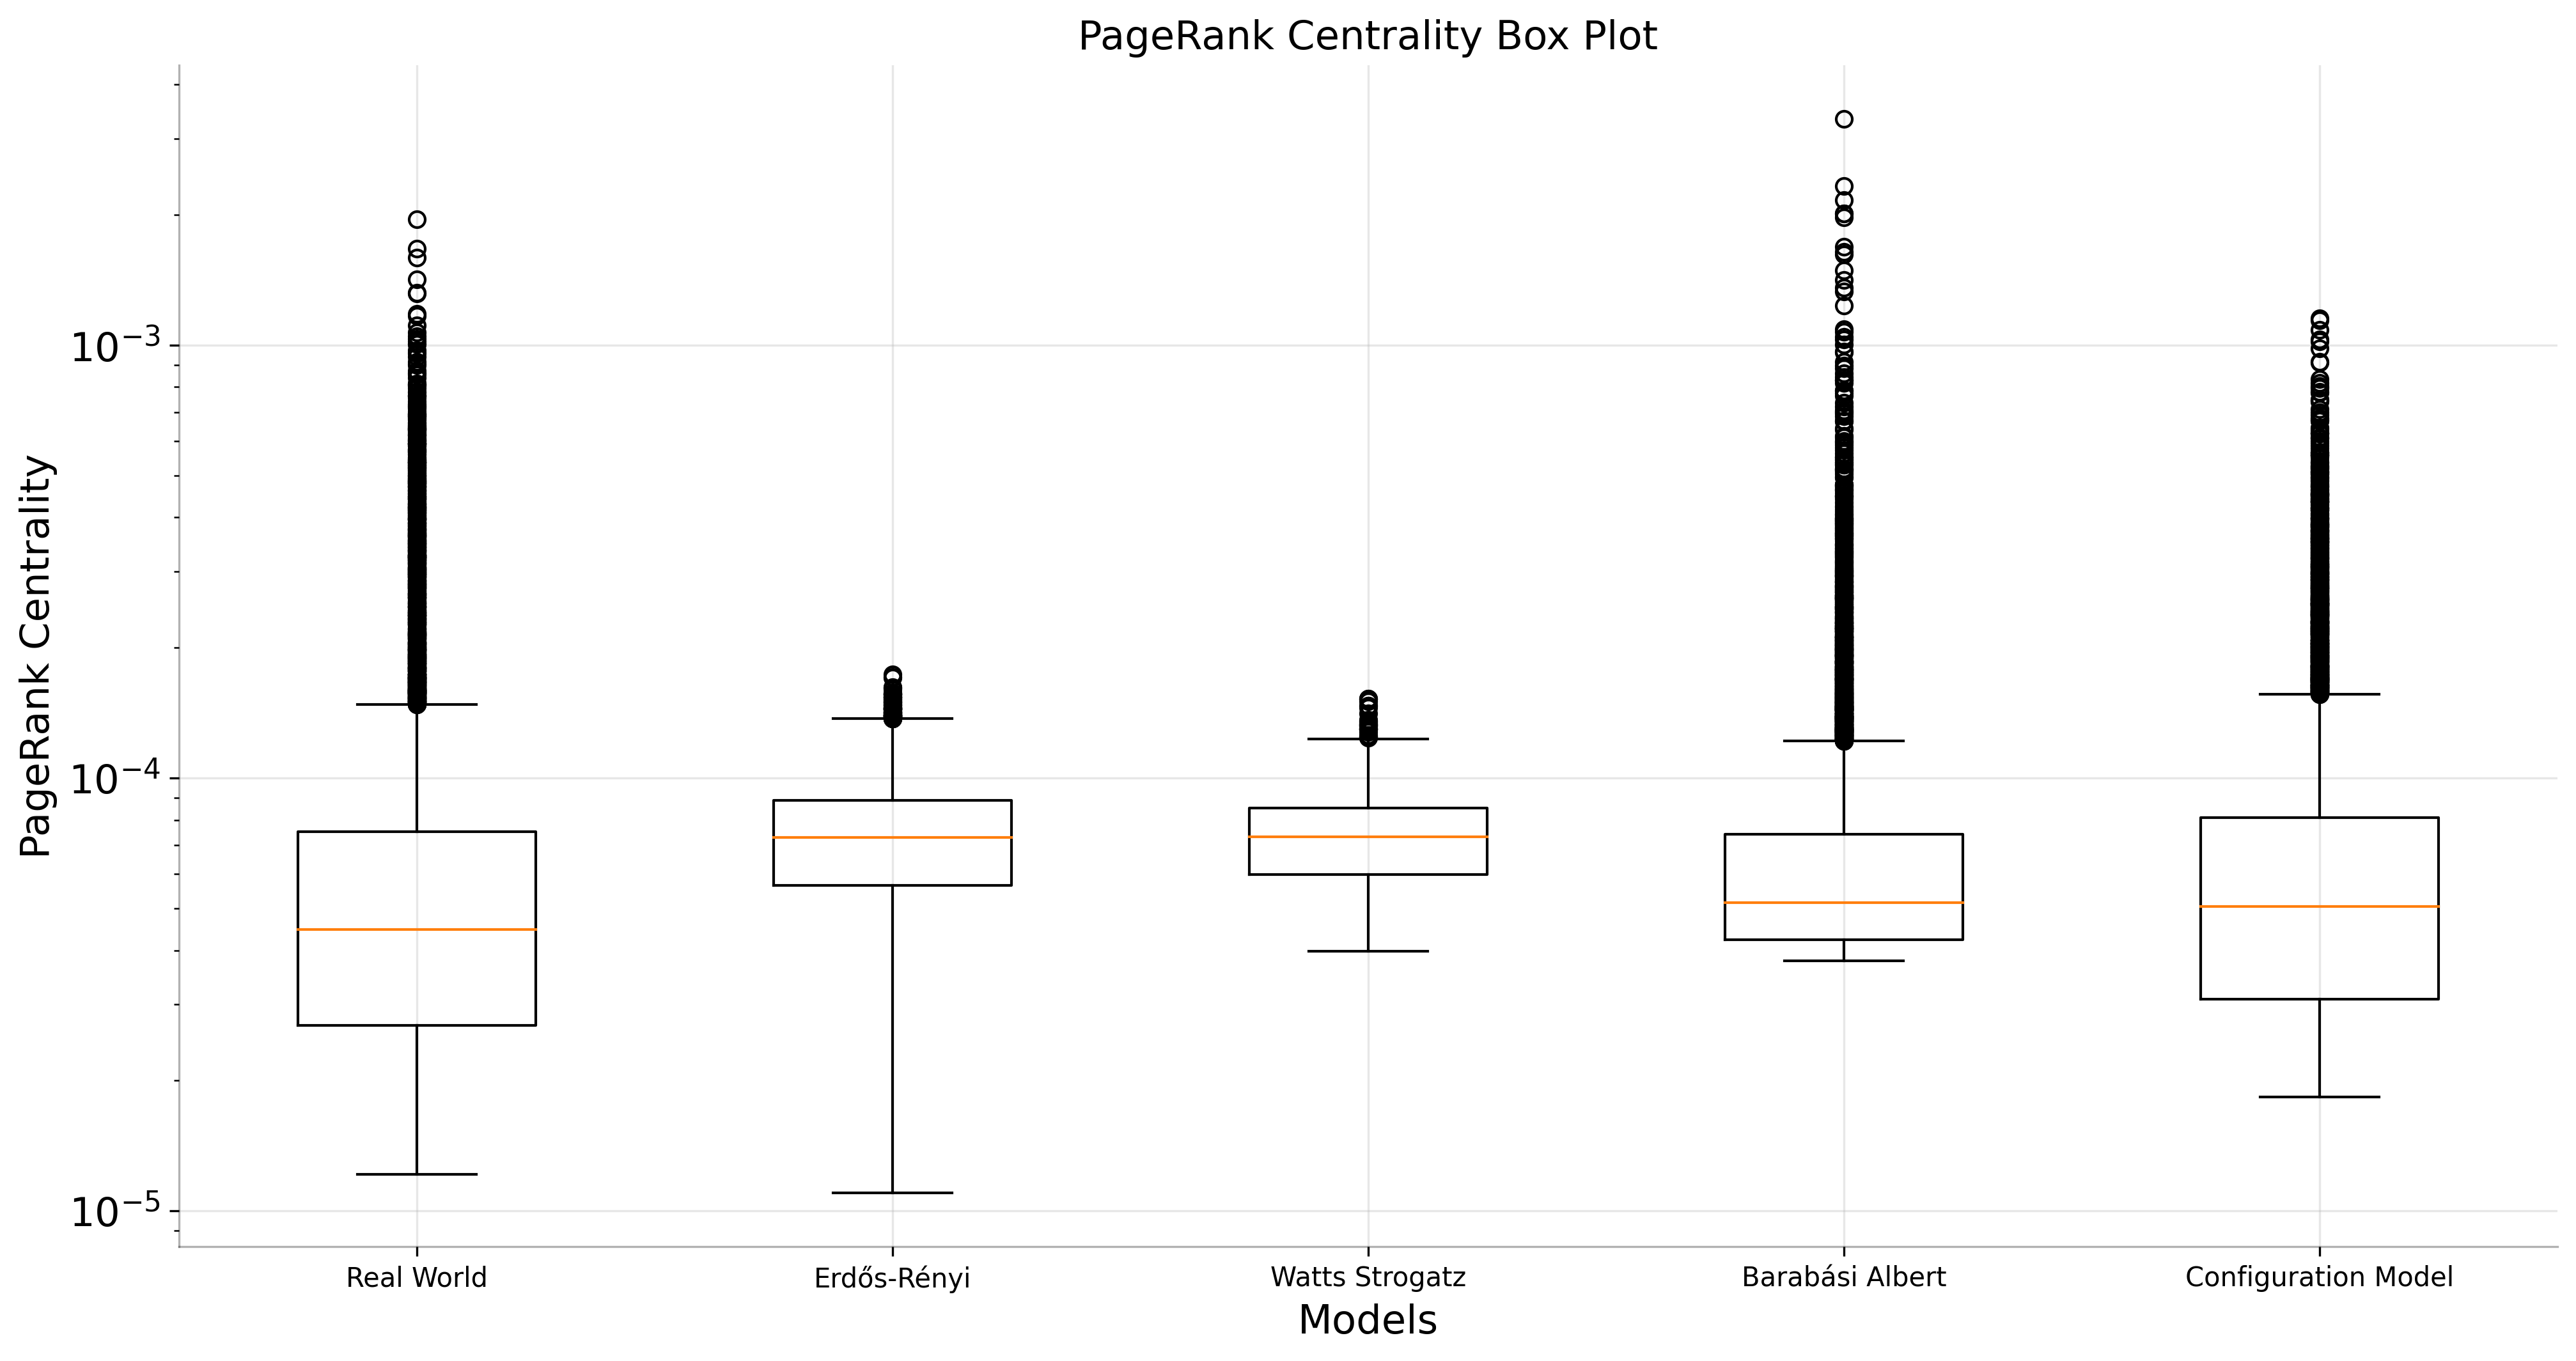

In [ ]:
box_plot(pagerank_data, "PageRank Centrality")

/tmp/ipykernel_205/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_205/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_205/3661112406.py:9

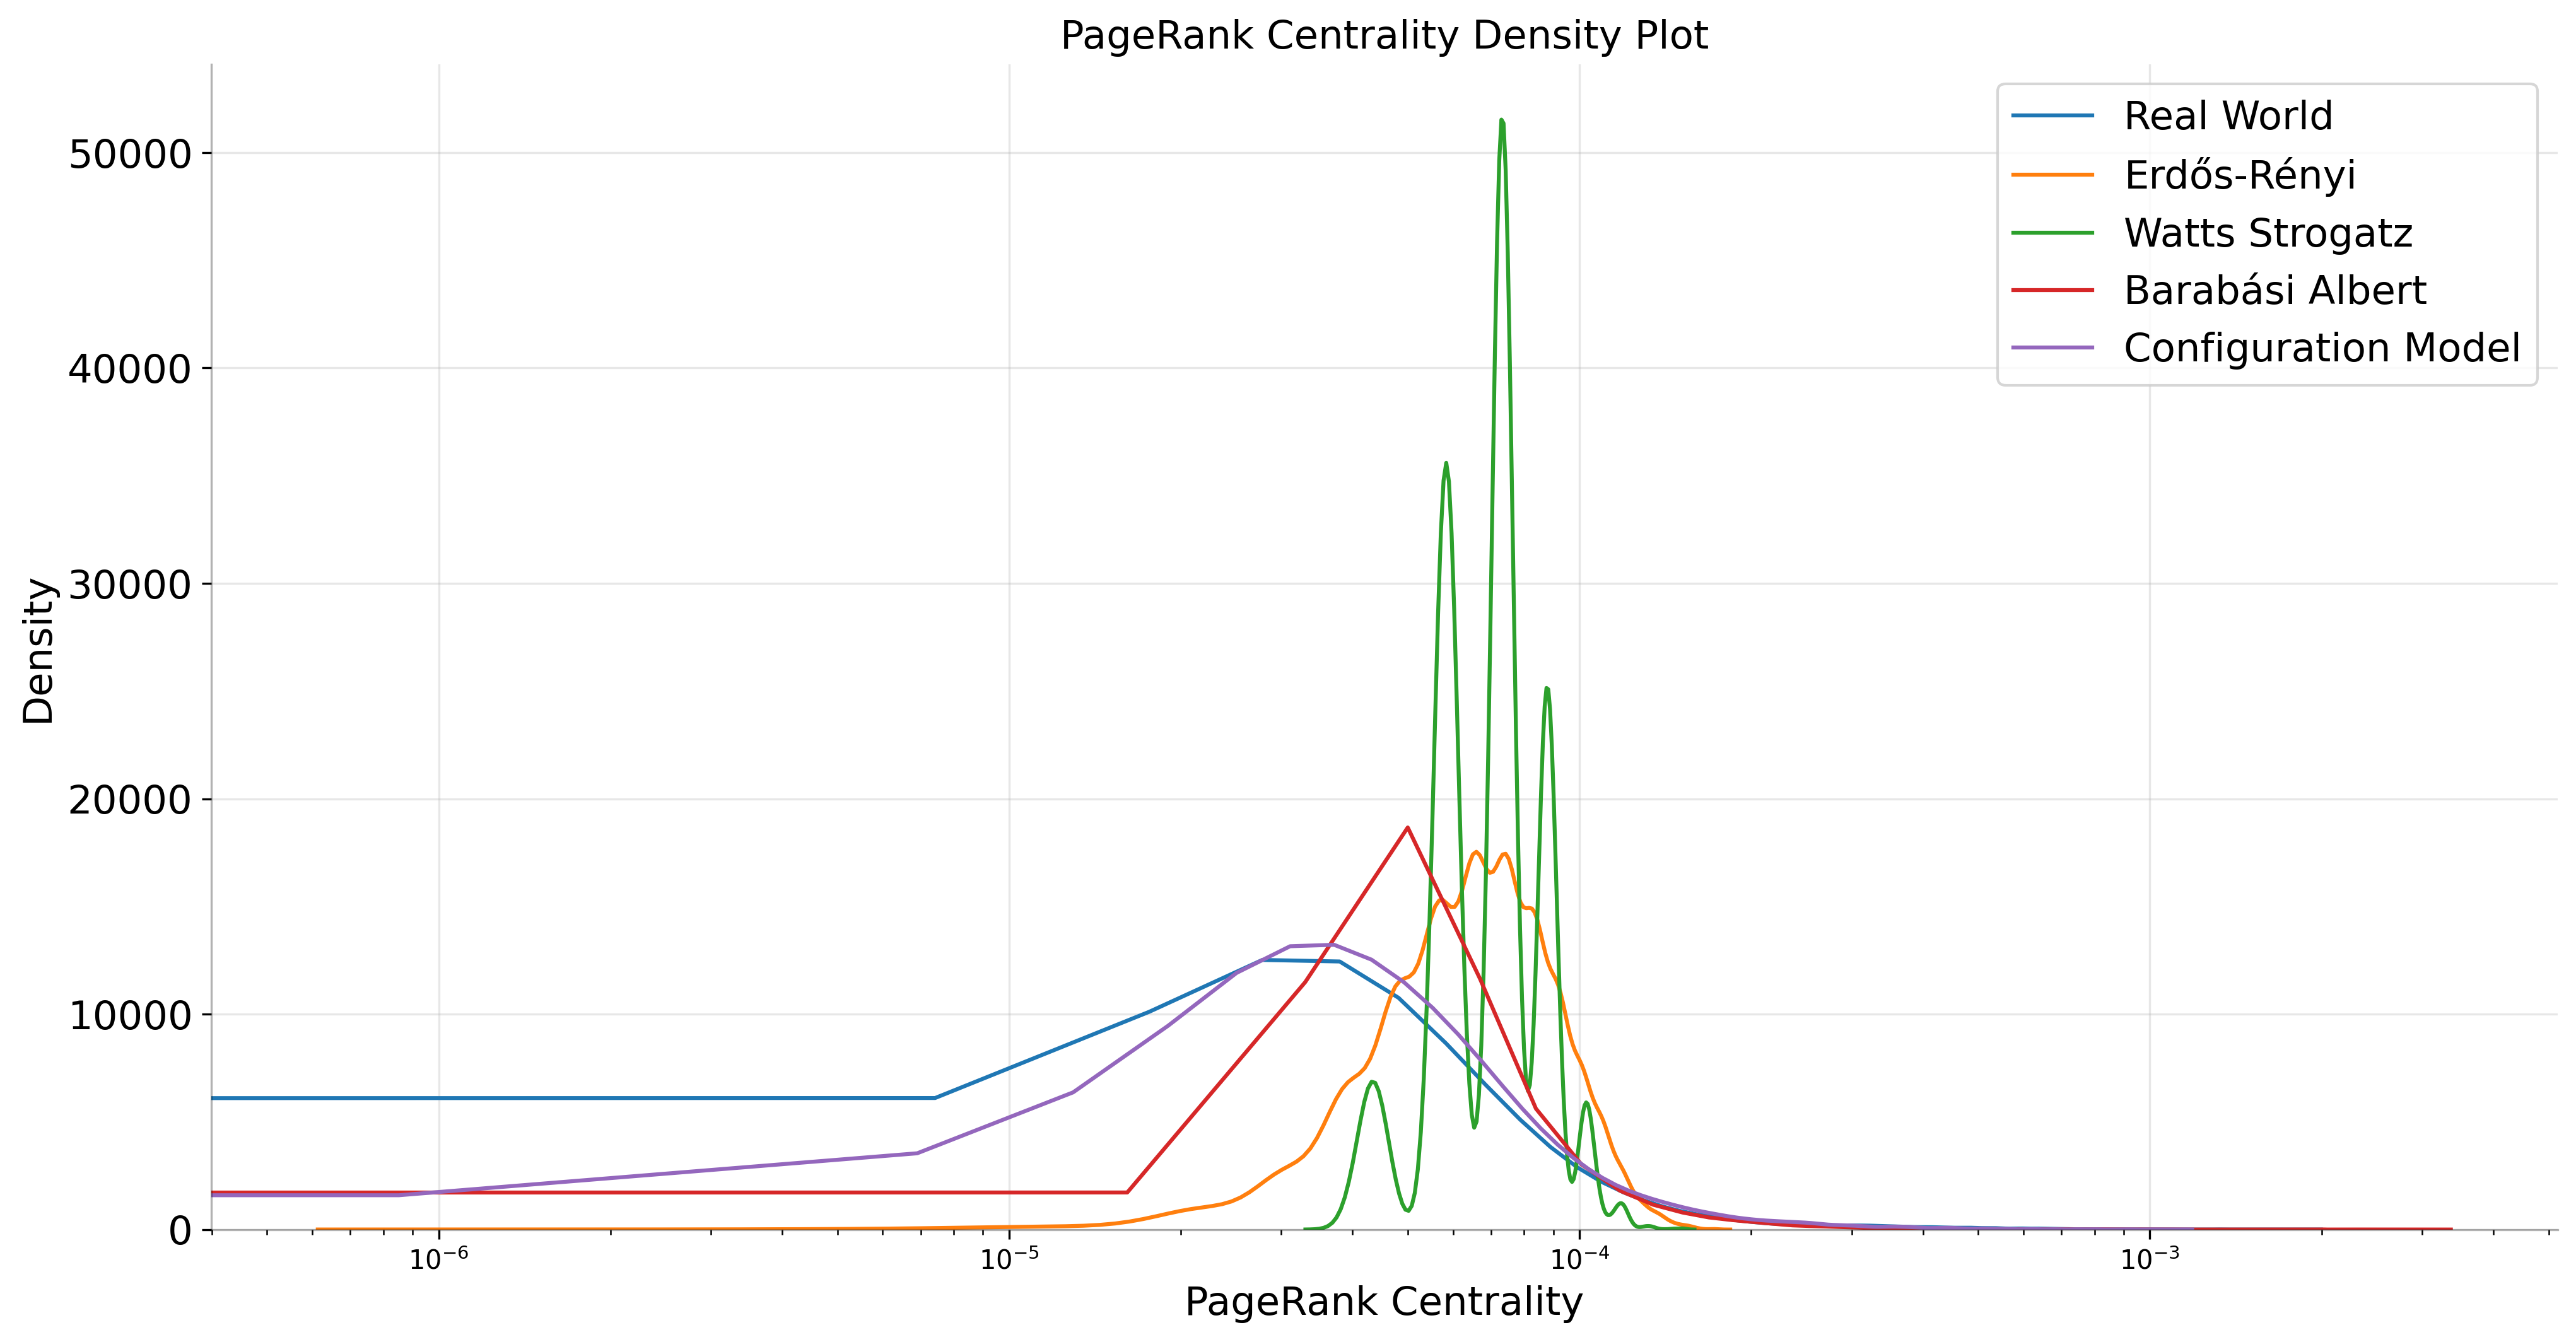

In [ ]:
dist_plot(pagerank_data, "PageRank Centrality")

/tmp/ipykernel_205/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)


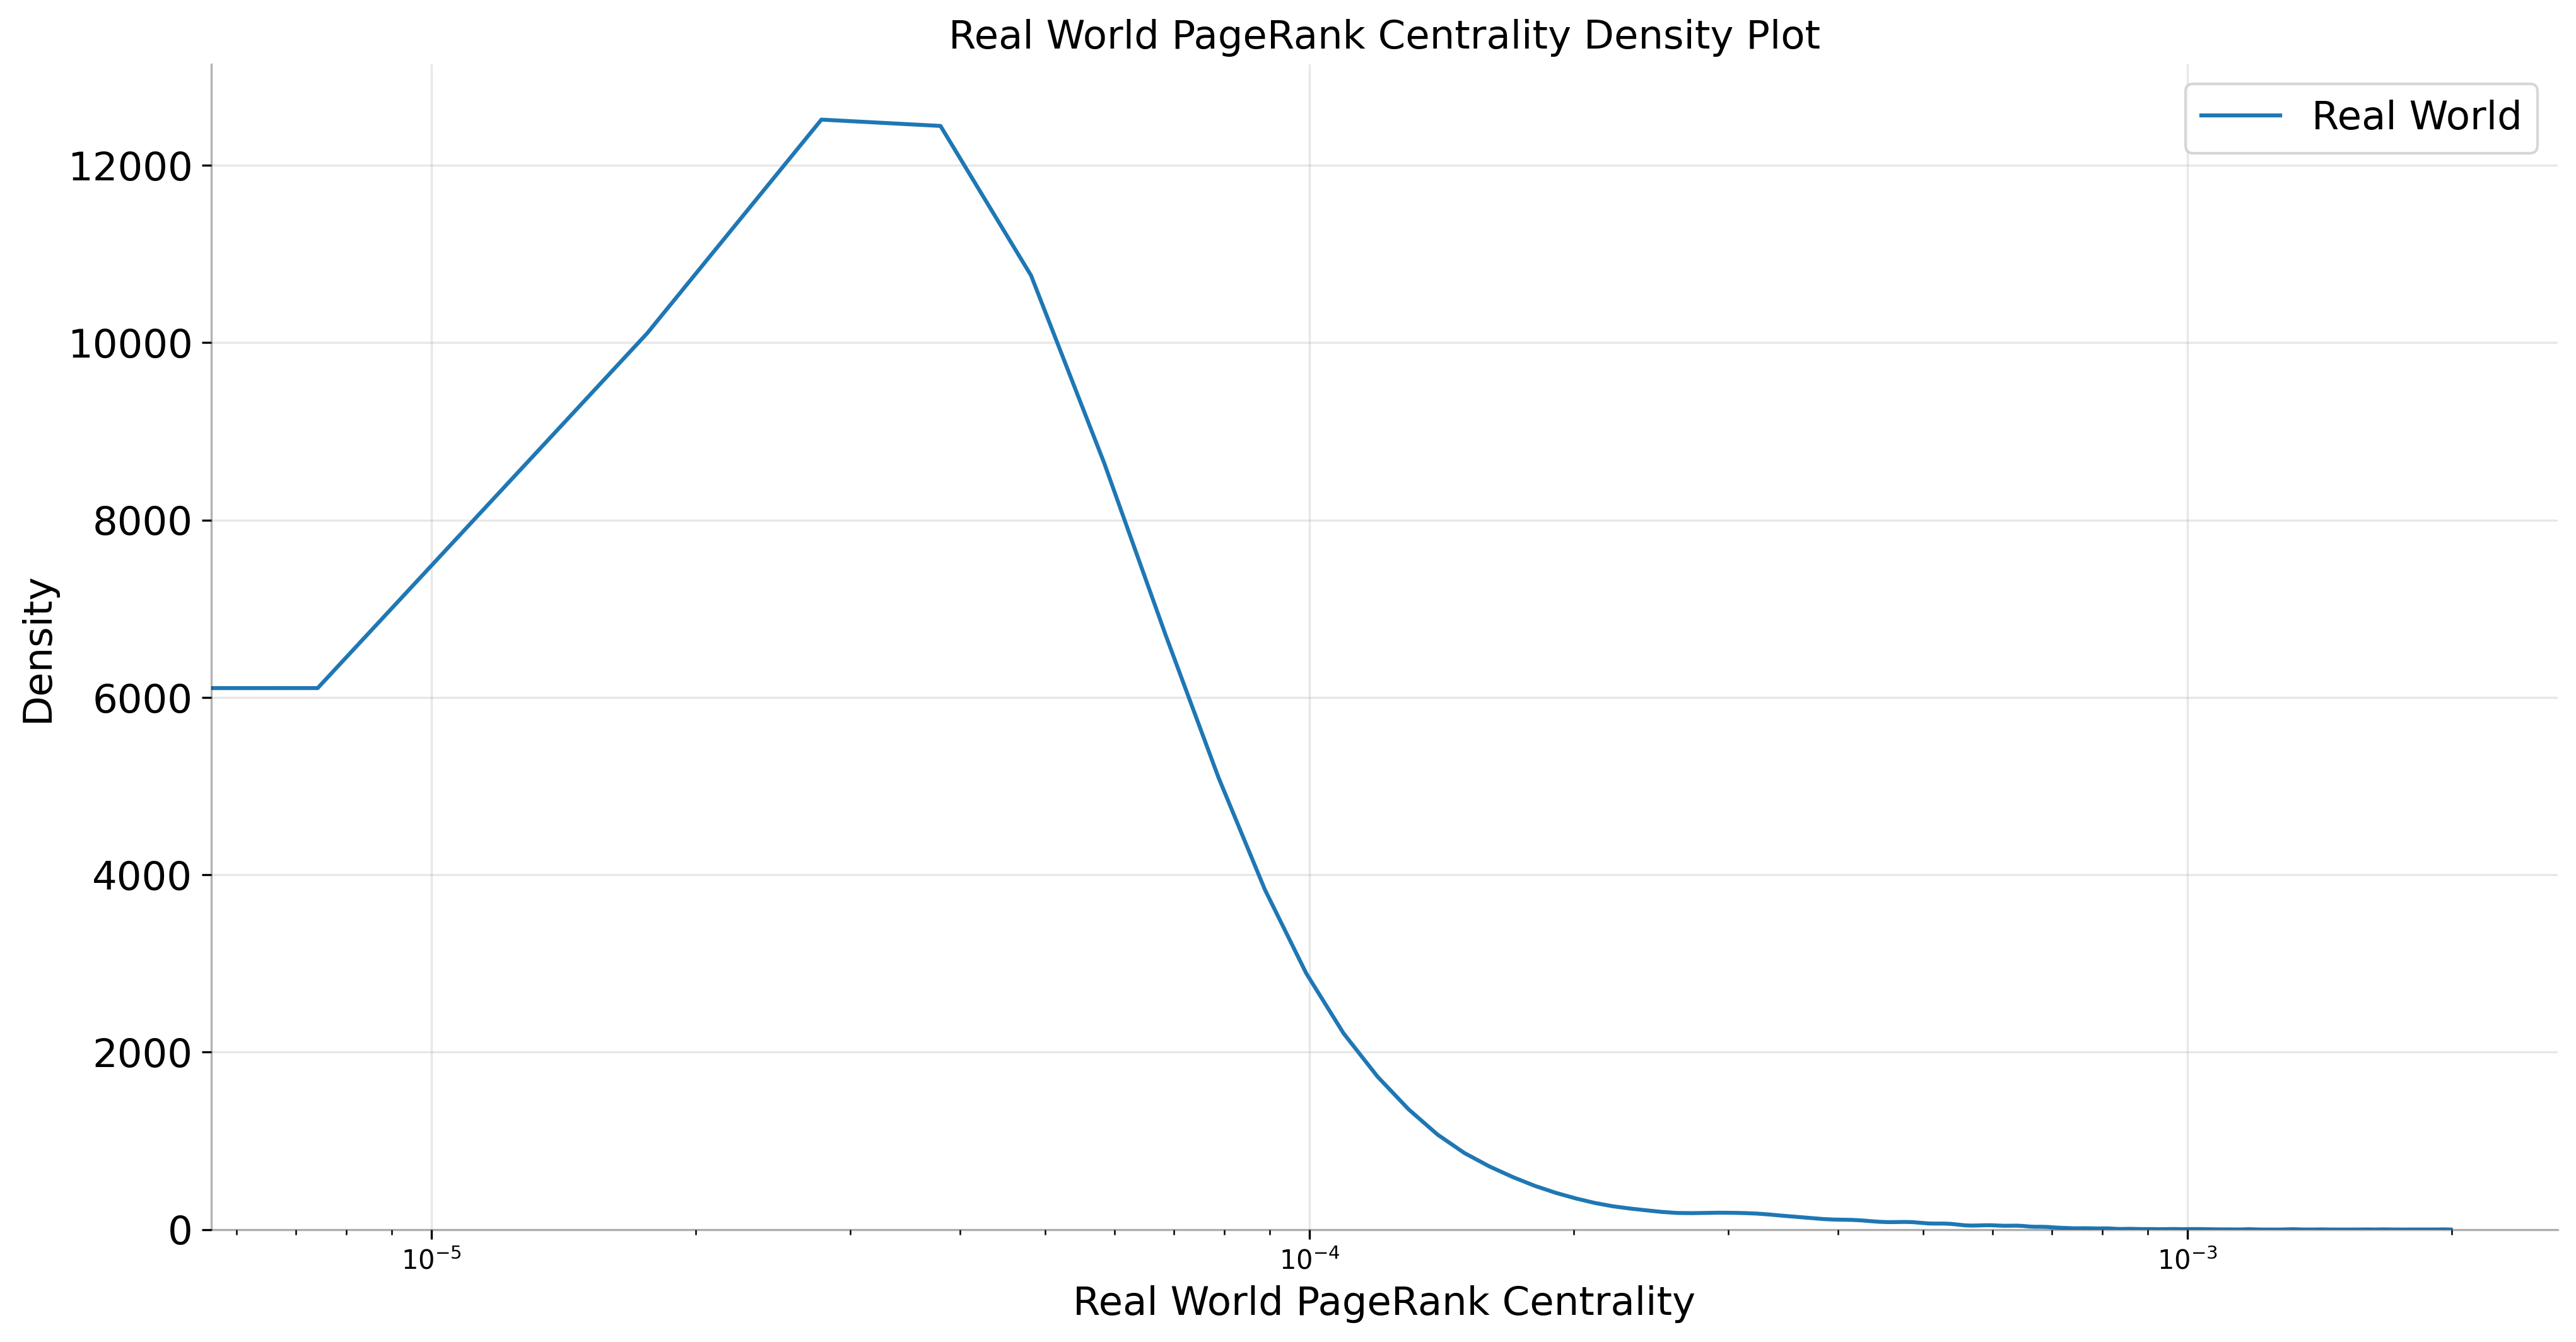

In [ ]:
dist_plot(real_world_pagerank_data, "Real World PageRank Centrality")

### Katz Centrality (non mi funziona il codice)

In [ ]:
import networkx as nx

In [ ]:
katz_centrality = nx.katz_centrality(G, alpha=0.85)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [0]:
katz_centrality = {k: v for k, v in sorted(katz_centrality.items(), key=lambda item: item[1], reverse=True)}

In [0]:
dict(itertools.islice(katz_centrality.items(), 10))#Top Ten

In [0]:
real_world_katz_list = list(katz_centrality.values())

In [0]:
er_katz_centrality = nx.katz_centrality(er)
er_katz_centrality = {k: v for k, v in sorted(er_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
er_katz_list = list(er_katz_centrality.values())

In [ ]:
ws_katz_centrality = nx.katz_centrality(ws)
ws_katz_centrality = {k: v for k, v in sorted(ws_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_katz_list = list(ws_katz_centrality.values())

In [ ]:
#ba_katz_centrality = nx.katz_centrality(ba)
#ba_katz_centrality = {k: v for k, v in sorted(ba_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
#ba_katz_list = list(ba_katz_centrality.values())

In [ ]:
#cm_katz_centrality = nx.katz_centrality(cm)
# cm_katz_centrality = {k: v for k, v in sorted(cm_katz_centrality.items(), key=lambda item: item[1], reverse=True)}
#cm_katz_list = list(cm_katz_centrality.values())

In [ ]:
#katz_data = {
    #"real_word":{
     #   "name":"Real World",
      #  "list":real_world_katz_list
   # },
    #"erdos_renyi":{
     #   "name":"Erdős-Rényi",
      #  "list":er_katz_list
    #},
    #"watts_strogatz":{
     #   "name":"Watts Strogatz",
      #  "list":ws_katz_list
    #},
    #"barabasi–Albert":{
    #    "name":"Barabási Albert",
    #    "list":ba_katz_list
    #},
    #"configuration_model":{
     #   "name":"Configuration Model",
      #  "list":cm_katz_list
    #}
#}
#real_world_katz_data = {
  #  "real_word":{
   #     "name":"Real World",
    #    "list":real_world_katz_list
    #}
#}

In [ ]:
#box_plot(katz_data, "Katz Centrality")

### Geometric Centrality

In [ ]:
def save(myDictionary, file_name):
    j = json.dumps(myDictionary)
    with open(file_name, 'w') as f:
        f.write(j)
        f.close()
def load(file_name):
    return json.load(open(file_name))

In [ ]:
closeness_centrality = {k: v for k, v in sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
dict(itertools.islice(closeness_centrality.items(), 10))#Top Ten

{'SAKO YOICHIRO': 0.15553438423913707,
 'TAKANO HIROAKI': 0.15544605514223953,
 'SAKODA KAZUYUKI': 0.15528469115674556,
 'ARAI TAKAO': 0.15450884585491273,
 'KOBAYASHI MASAHARU': 0.15426613173254042,
 'TAKAHASHI HIROAKI': 0.1523533340072447,
 'KUNIHIRO TAKUSHI': 0.15143154558433675,
 'TAKEUCHI TAKASHI': 0.15060718954297925,
 'TANAKA SHINICHI': 0.15045747010165306,
 'NOGUCHI TAKAHARU': 0.15018697055233304}

In [ ]:
save(closeness_centrality, "closeness_centrality.json")

In [ ]:
closeness_centrality = load("closeness_centrality.json")
closeness_list = list(closeness_centrality.values())

In [ ]:
er_closeness_centrality = nx.closeness_centrality(er)
er_closeness_centrality = {k: v for k, v in sorted(er_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
er_closeness_list = list(er_closeness_centrality.values())

In [ ]:
save(er_closeness_centrality, "er_closeness_centrality.json")

In [ ]:
er_closeness_centrality = load("er_closeness_centrality.json")
er_closeness_list = list(er_closeness_centrality.values())

In [ ]:
ws_closeness_centrality = nx.closeness_centrality(ws)
ws_closeness_centrality = {k: v for k, v in sorted(ws_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_closeness_list = list(ws_closeness_centrality.values())
save(ws_closeness_centrality, "ws_closeness_centrality.json")

In [ ]:
ws_closeness_centrality = load("ws_closeness_centrality.json")
ws_closeness_list = list(ws_closeness_centrality.values())

In [ ]:
ba_closeness_centrality = nx.closeness_centrality(ba)
ba_closeness_centrality = {k: v for k, v in sorted(ba_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_closeness_list = list(ba_closeness_centrality.values())
save(ba_closeness_centrality, "ba_closeness_centrality.json")

In [ ]:
ba_closeness_centrality = load("ba_closeness_centrality.json")
ba_closeness_list = list(ba_closeness_centrality.values())

In [ ]:
cm_closeness_centrality = nx.closeness_centrality(cm)
cm_closeness_centrality = {k: v for k, v in sorted(cm_closeness_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_closeness_list = list(cm_closeness_centrality.values())
save(cm_closeness_centrality, "cm_closeness_centrality.json")

In [ ]:
cm_closeness_centrality = load("cm_closeness_centrality.json")
cm_closeness_list = list(cm_closeness_centrality.values())

In [ ]:
closeness_data = {
    "real_word":{
        "name":"Real World",
        "list":closeness_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_closeness_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_closeness_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_closeness_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_closeness_list
    }
}
real_world_closeness_data = {
    "real_word":{
        "name":"Real World",
        "list":closeness_list
    }
}

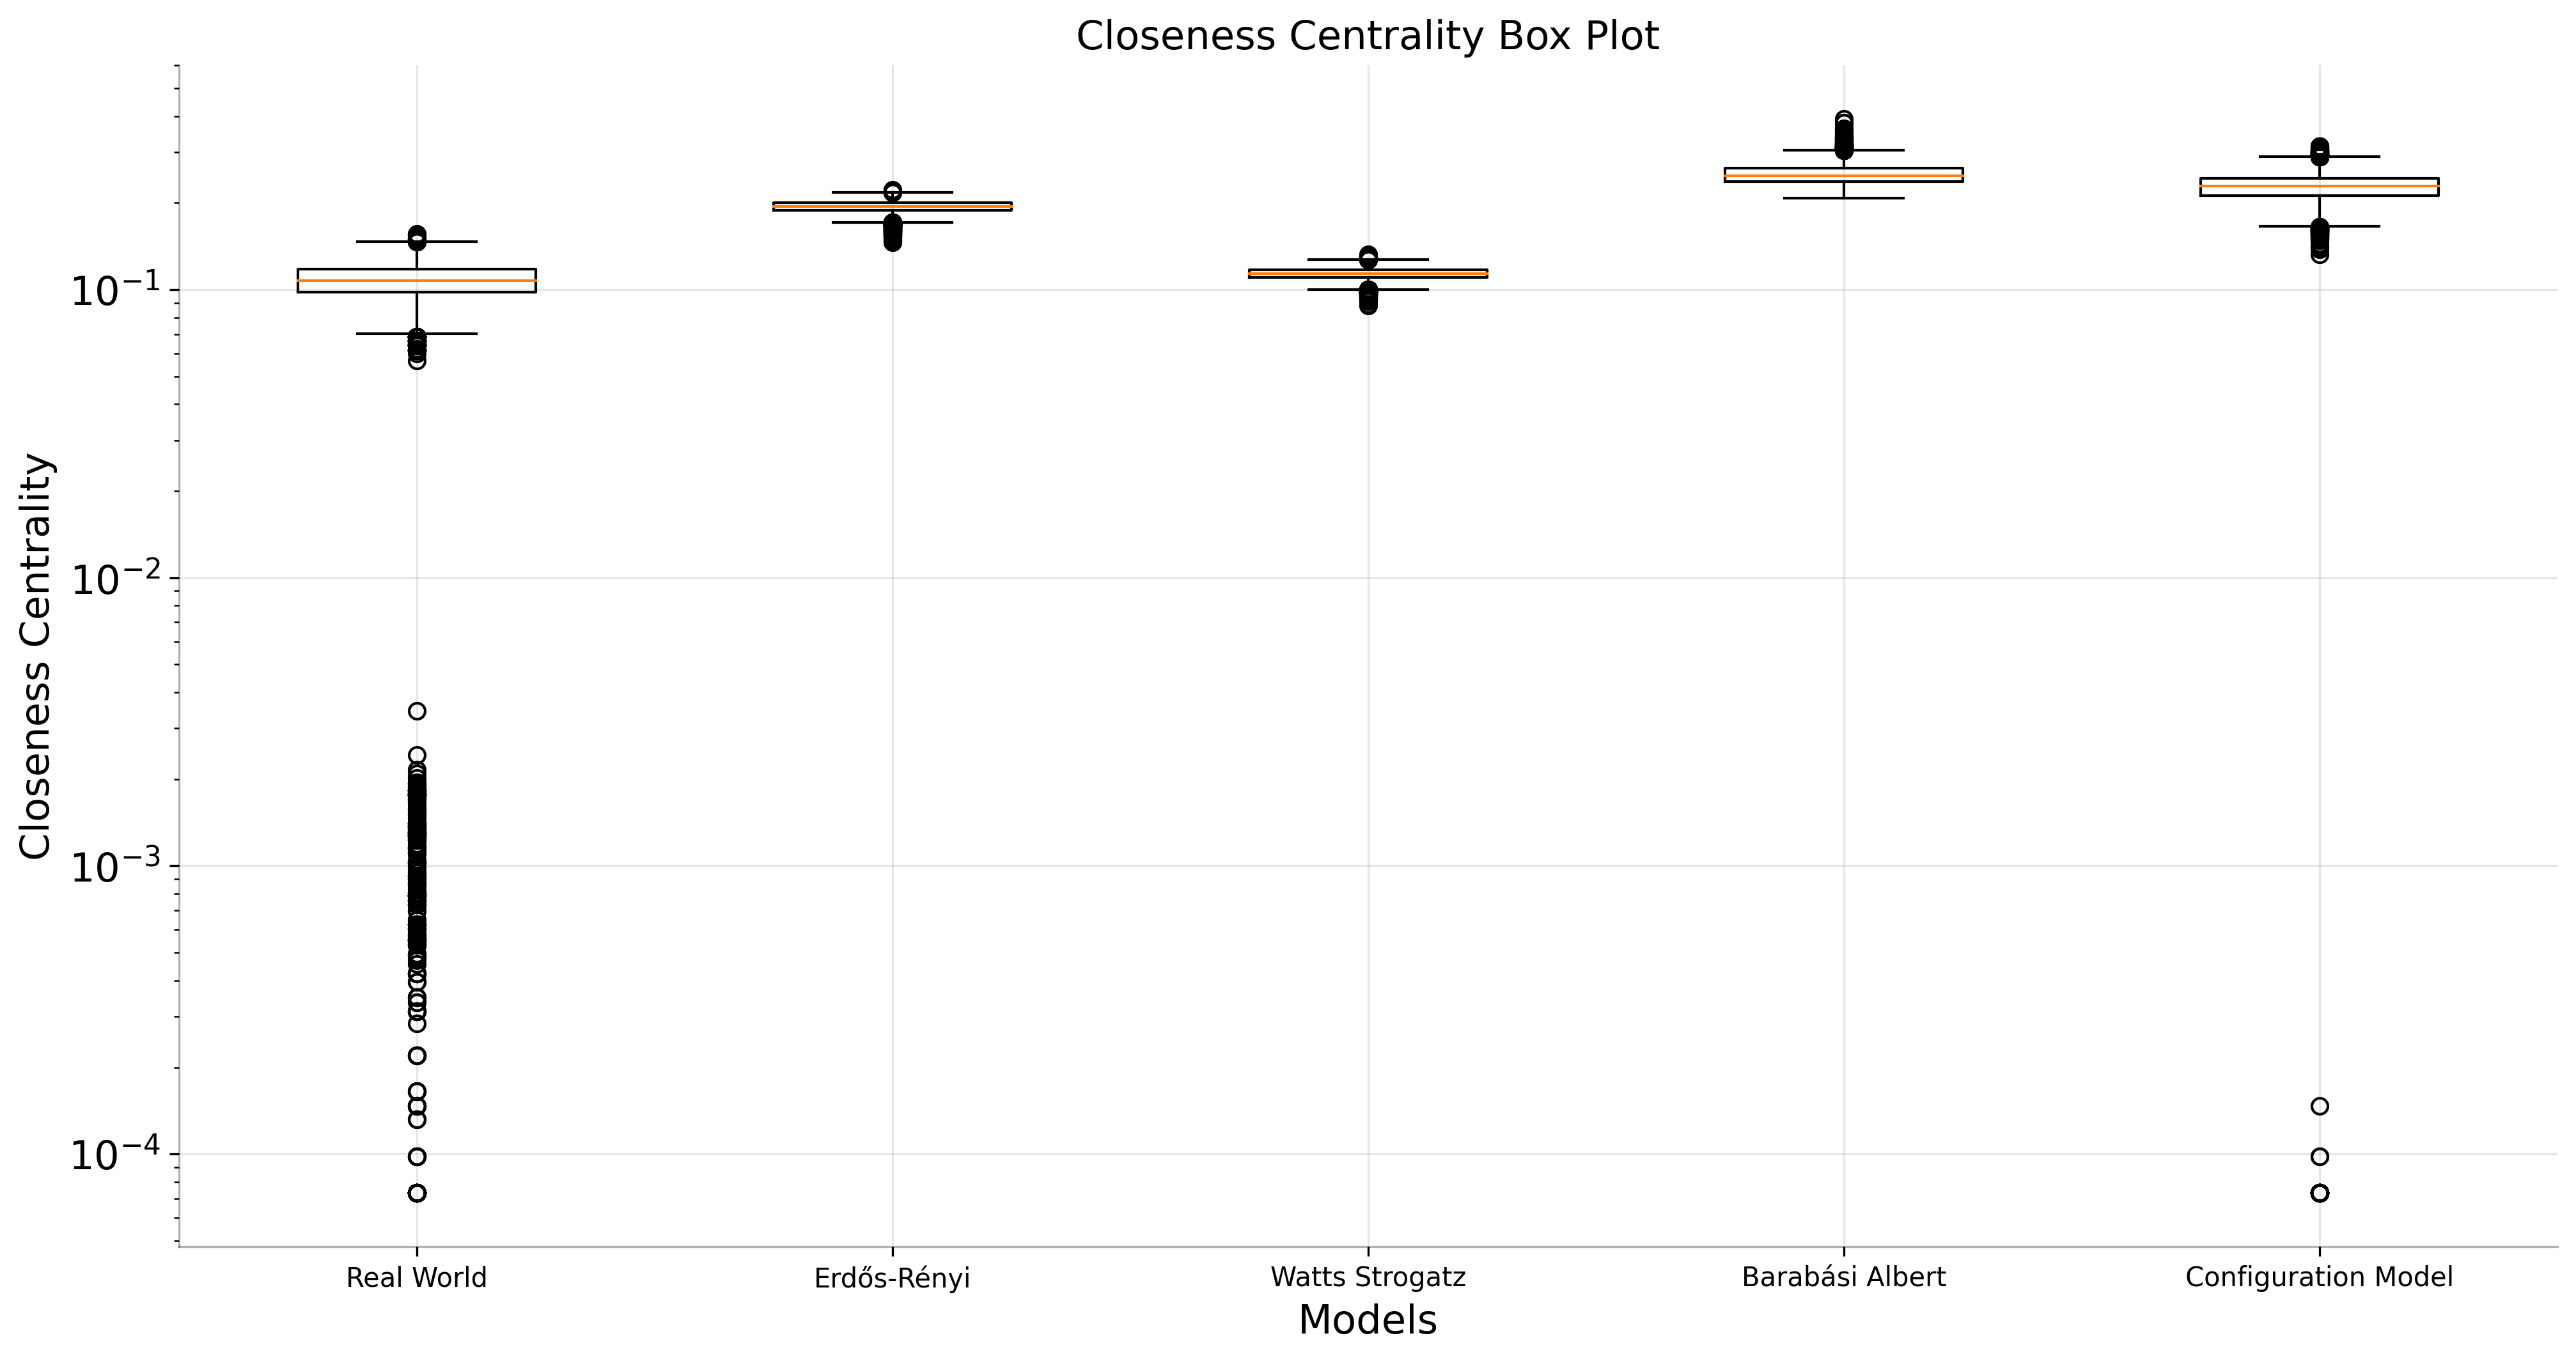

In [ ]:
box_plot(closeness_data, "Closeness Centrality")

/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_265/3661112406.py:9

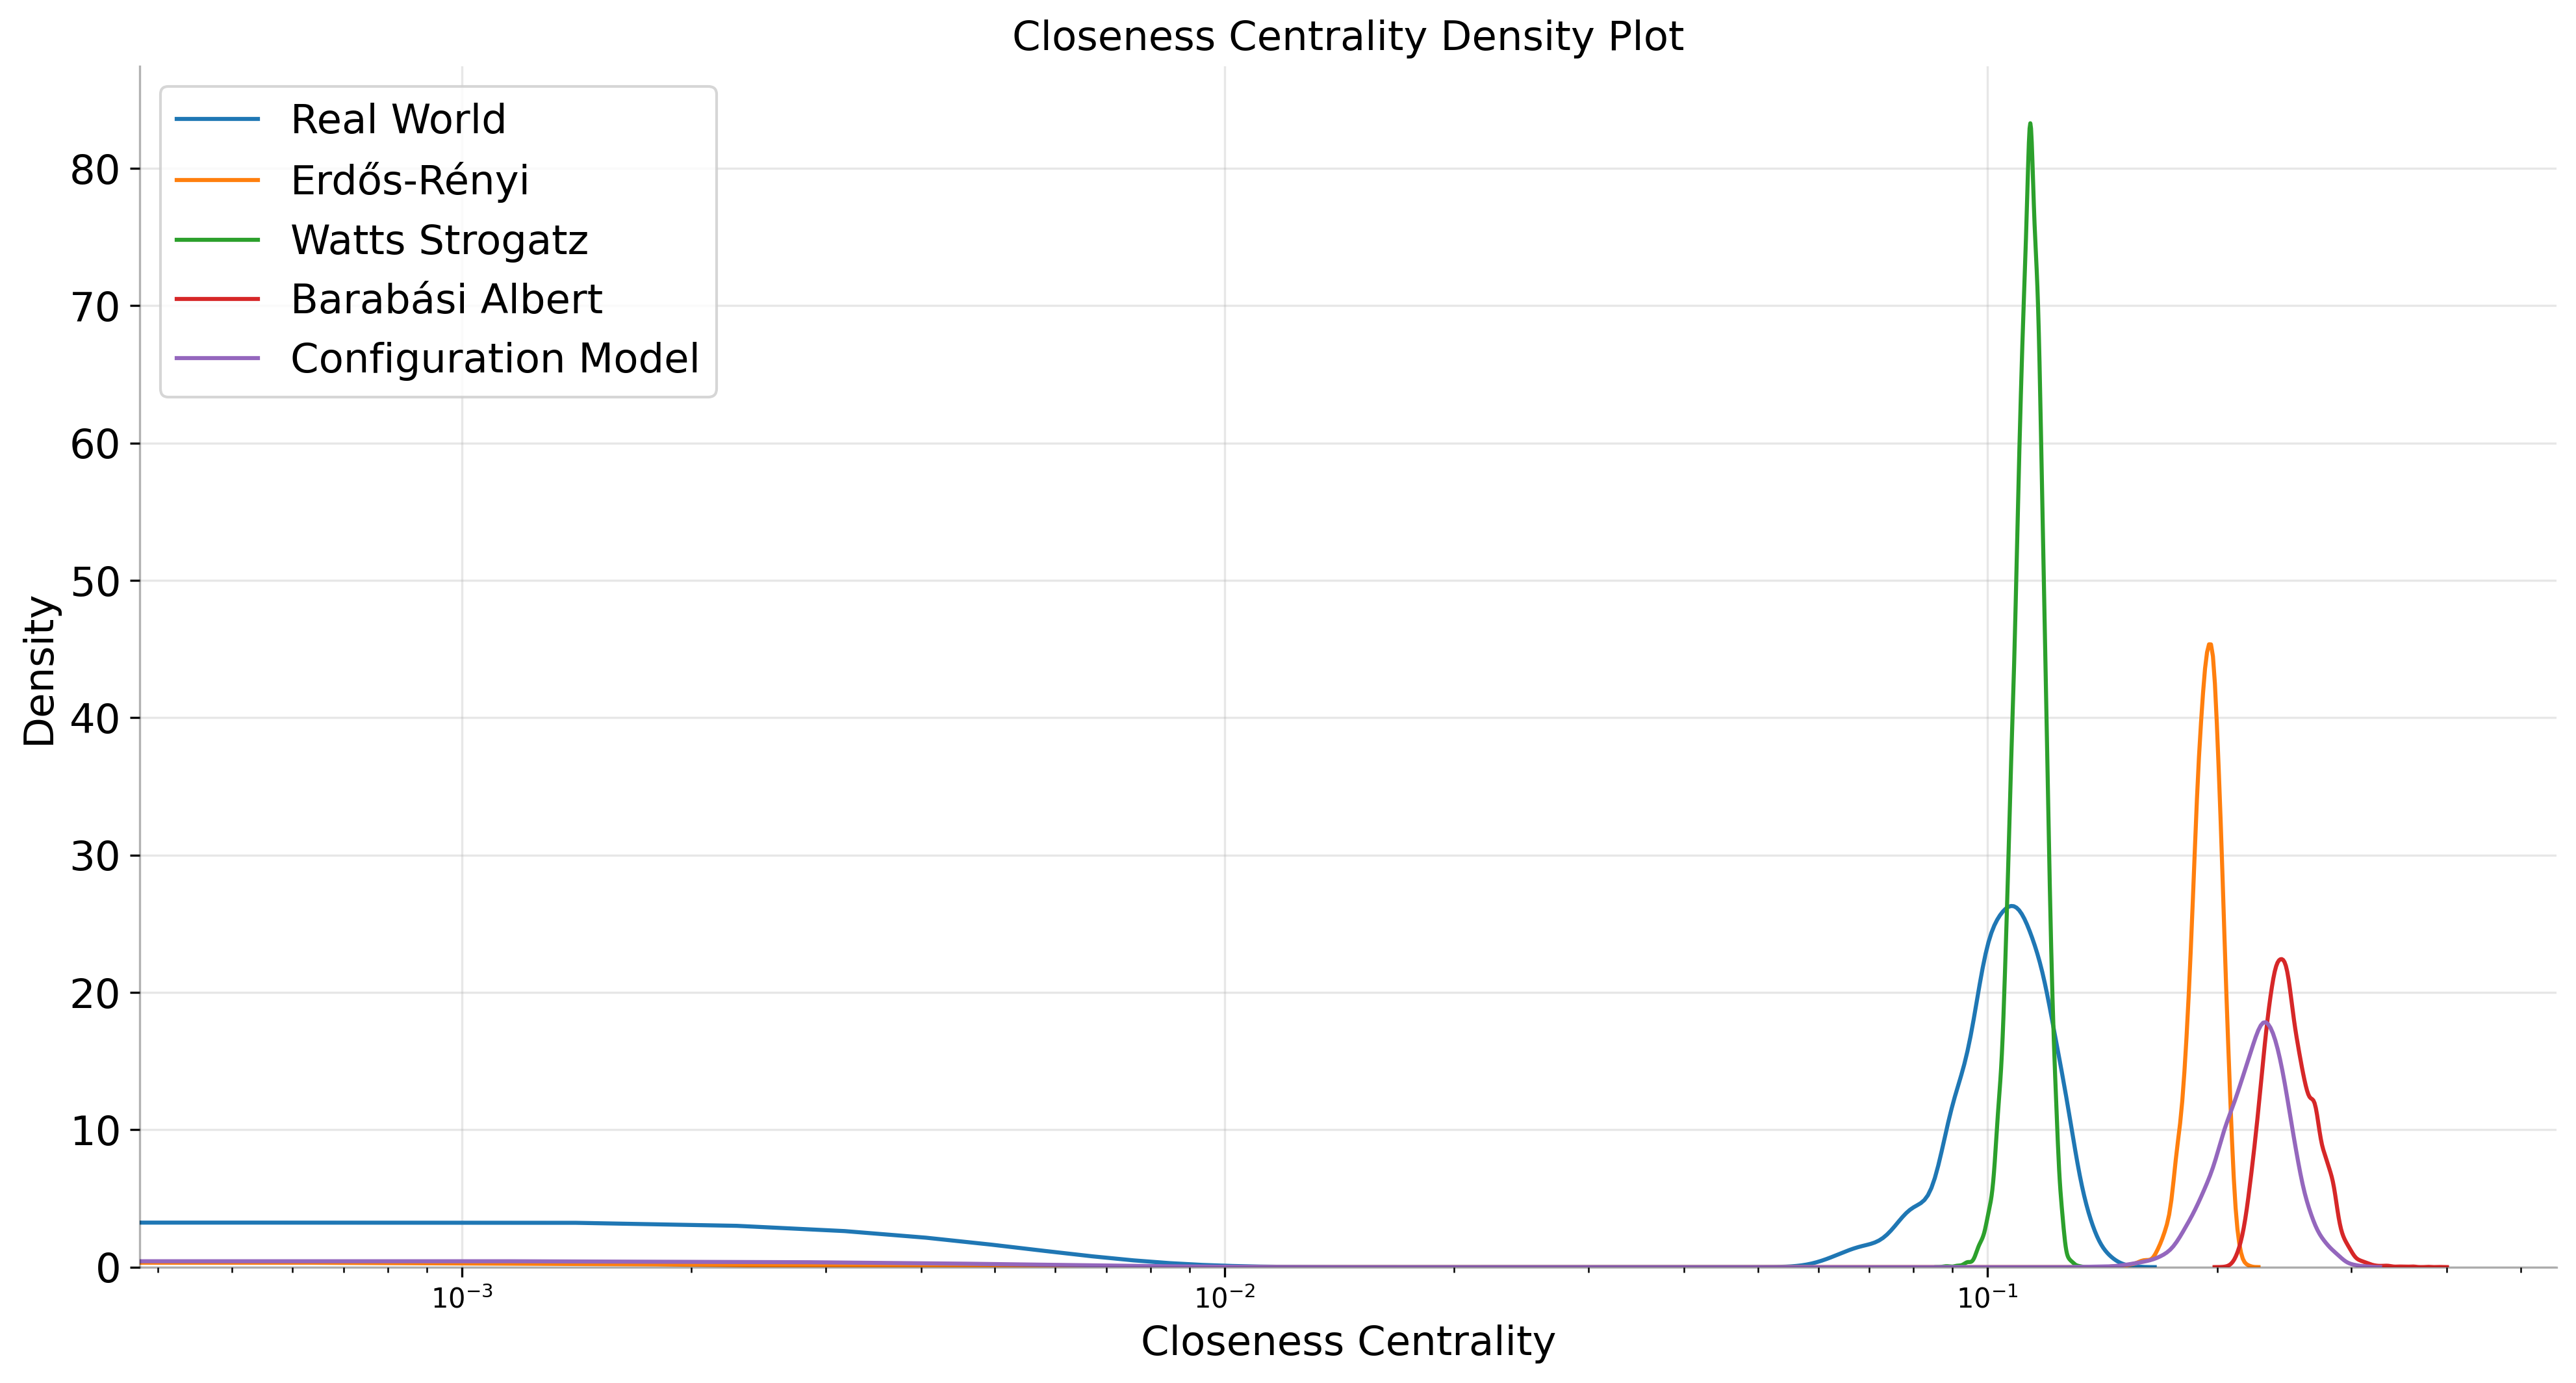

In [ ]:
dist_plot(closeness_data, "Closeness Centrality")

/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)


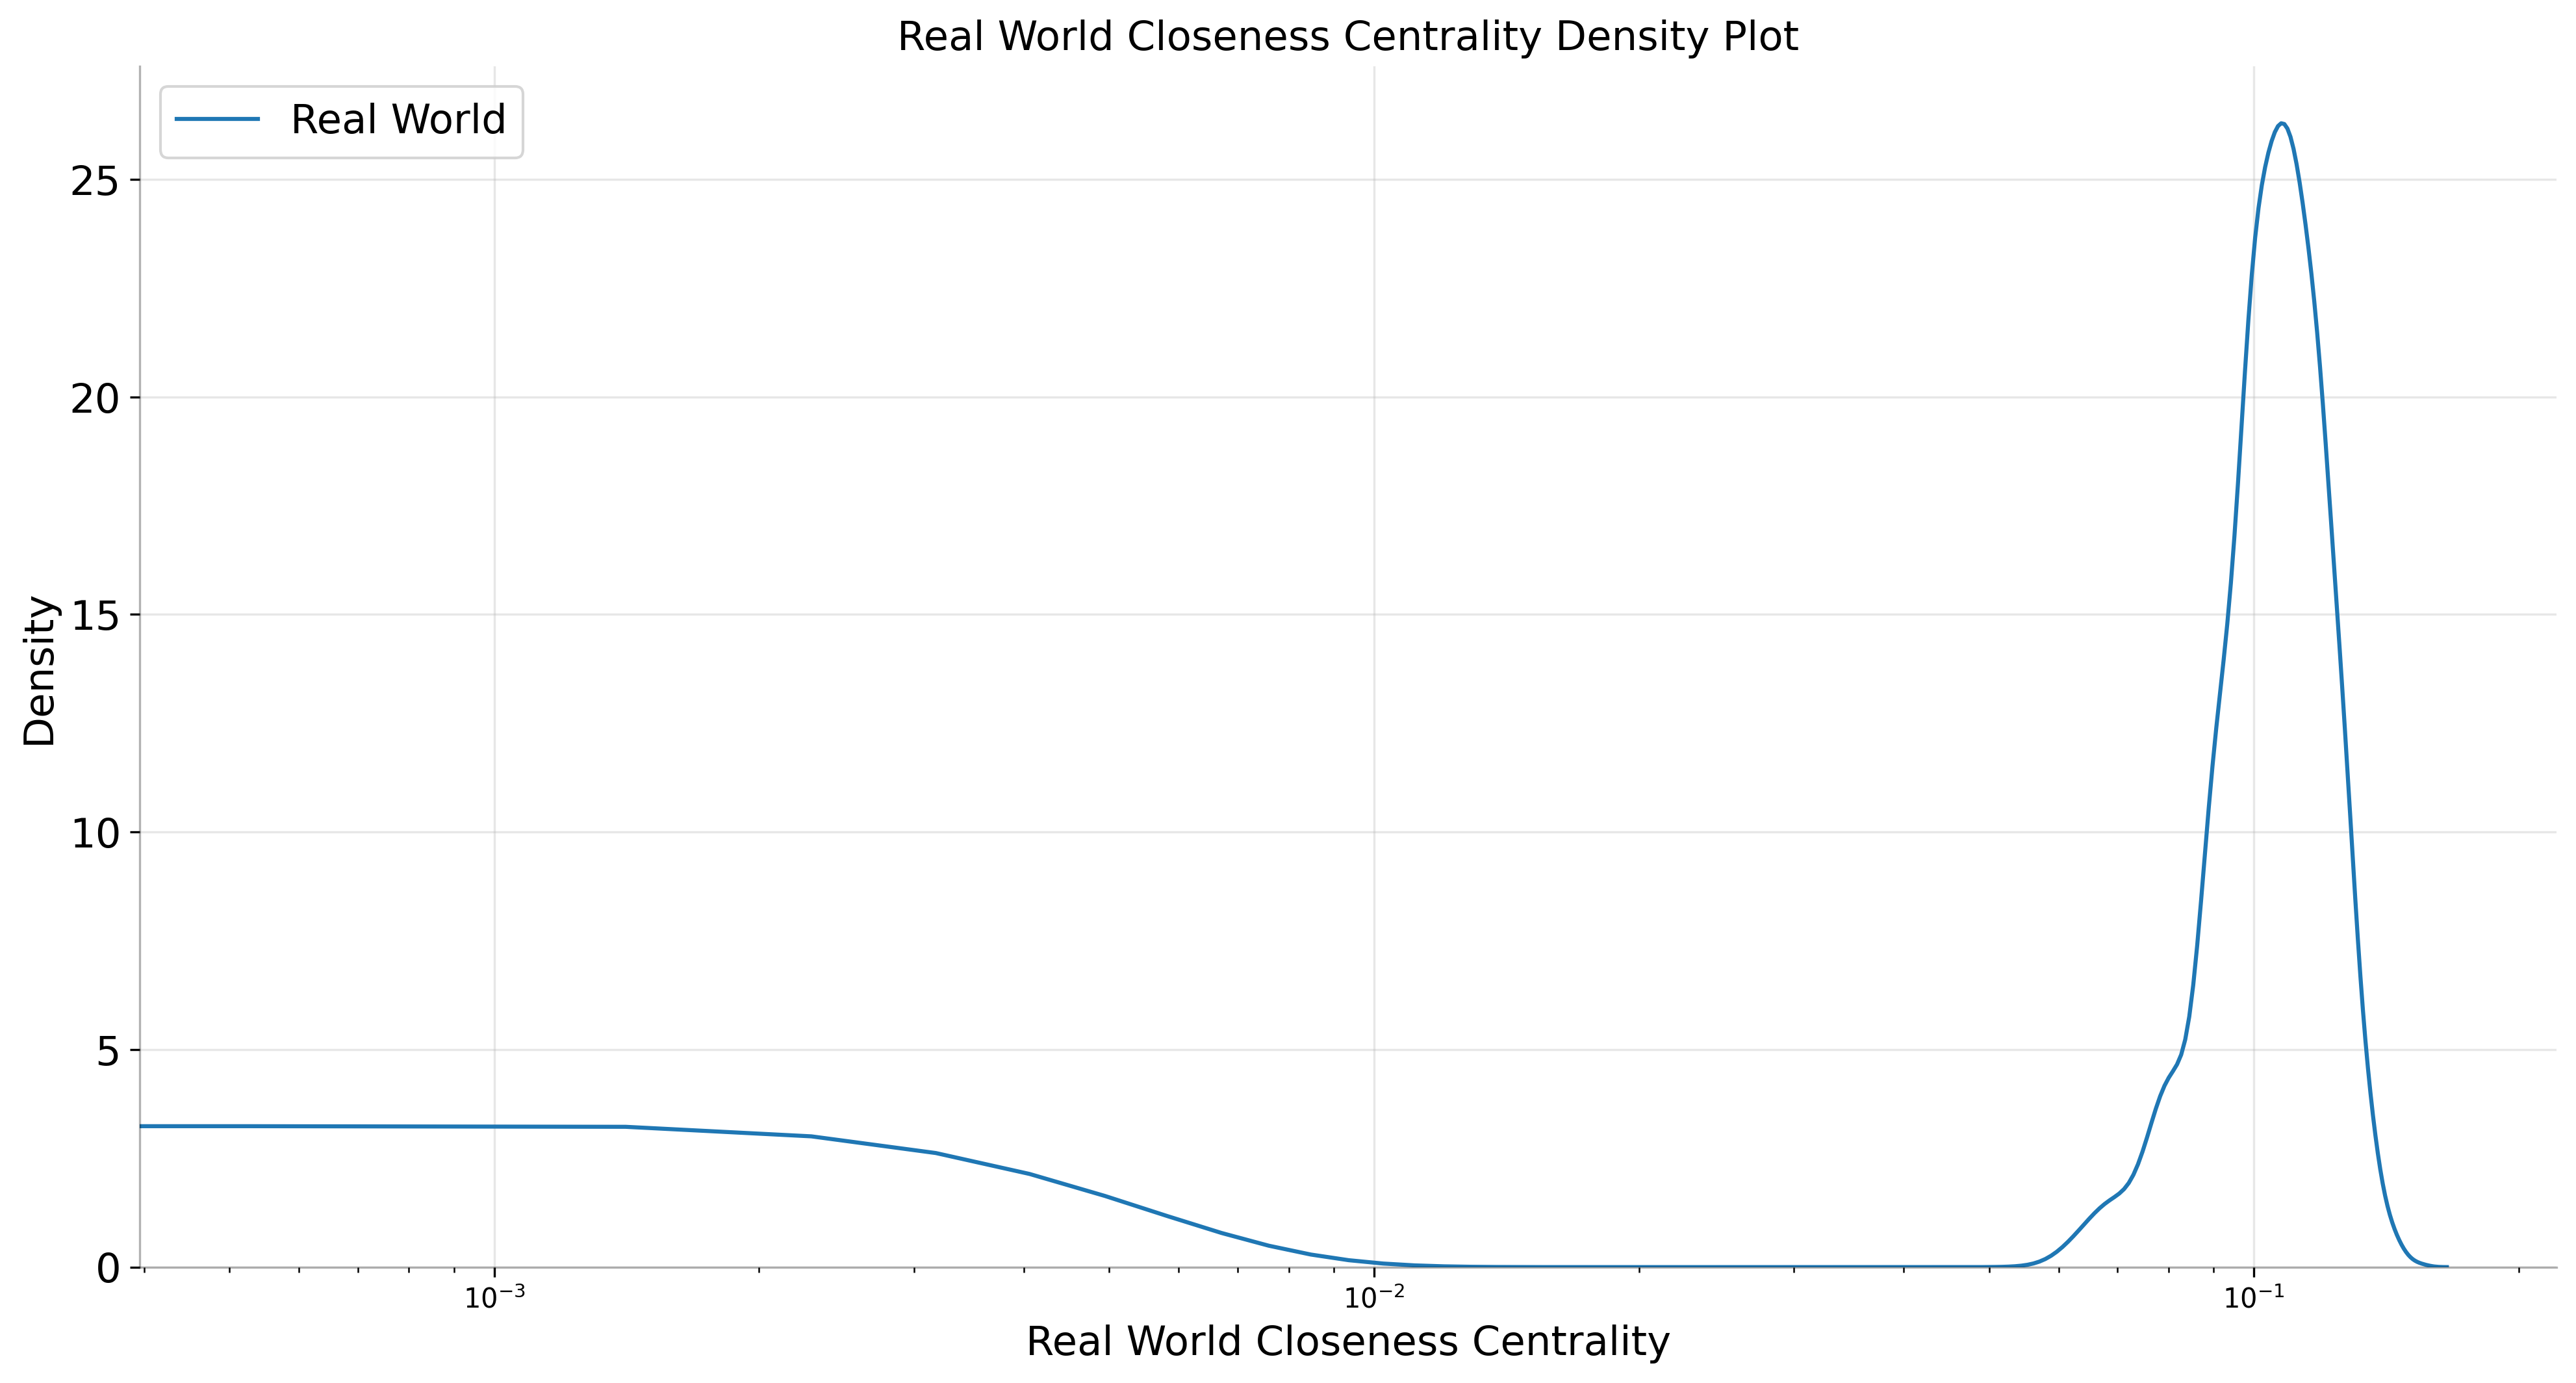

In [ ]:
dist_plot(real_world_closeness_data, "Real World Closeness Centrality")

### Harmonic Centrality

In [ ]:
harmonic_centrality = nx.harmonic_centrality(G)

In [ ]:
harmonic_centrality = {k: v for k, v in sorted(harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
dict(itertools.islice(harmonic_centrality.items(), 10))#Top Ten

{'SATO HIROSHI': 2590.2237544318386,
 'SAKO YOICHIRO': 2535.0480810857157,
 'TAKAHASHI KENJI': 2519.172767510312,
 'KONDO TETSUJIRO': 2480.8010521342026,
 'IKEDA MASAMI': 2480.5527212984184,
 'KOITABASHI NORIBUMI': 2460.42294274363,
 'YAMADA AKITOSHI': 2459.5958351289983,
 'TAJIKA HIROSHI': 2456.470380028571,
 'HIRABAYASHI HIROMITSU': 2448.2523660980573,
 'SUGIMOTO HITOSHI': 2446.9940327647114}

In [ ]:
save(harmonic_centrality ,"harmonic_centrality.json")

In [ ]:
harmonic_centrality = load("harmonic_centrality.json")
harmonic_list = list(harmonic_centrality.values())

In [ ]:
er_harmonic_centrality = nx.harmonic_centrality(er)
er_harmonic_centrality = {k: v for k, v in sorted(er_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
er_harmonic_list = list(er_harmonic_centrality.values())
save(er_harmonic_centrality ,"er_harmonic_centrality.json")

In [ ]:
er_harmonic_centrality = load("er_harmonic_centrality.json")
er_harmonic_list = list(er_harmonic_centrality.values())

In [ ]:
ws_harmonic_centrality = nx.harmonic_centrality(ws)
ws_harmonic_centrality = {k: v for k, v in sorted(ws_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_harmonic_list = list(ws_harmonic_centrality.values())
save(ws_harmonic_centrality ,"ws_harmonic_centrality.json")

In [ ]:
ws_harmonic_centrality = load("ws_harmonic_centrality.json")
ws_harmonic_list = list(ws_harmonic_centrality.values())

In [ ]:
ba_harmonic_centrality = nx.harmonic_centrality(ba)
ba_harmonic_centrality = {k: v for k, v in sorted(ba_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_harmonic_list = list(ba_harmonic_centrality.values())
save(ba_harmonic_centrality ,"ba_harmonic_centrality.json")

In [ ]:
ba_harmonic_centrality = load("ba_harmonic_centrality.json")
ba_harmonic_list = list(ba_harmonic_centrality.values())

In [ ]:
cm_harmonic_centrality = nx.harmonic_centrality(cm)
cm_harmonic_centrality = {k: v for k, v in sorted(cm_harmonic_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_harmonic_list = list(cm_harmonic_centrality.values())
save(cm_harmonic_centrality ,"cm_harmonic_centrality.json")

In [ ]:
cm_harmonic_centrality = load("cm_harmonic_centrality.json")
cm_harmonic_list = list(cm_harmonic_centrality.values())

In [ ]:
harmonic_data = {
    "real_word":{
        "name":"Real World",
        "list":harmonic_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_harmonic_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_harmonic_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_harmonic_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_harmonic_list
    }
}
real_world_harmonic_data = {
    "real_word":{
        "name":"Real World",
        "list":harmonic_list
    }
}

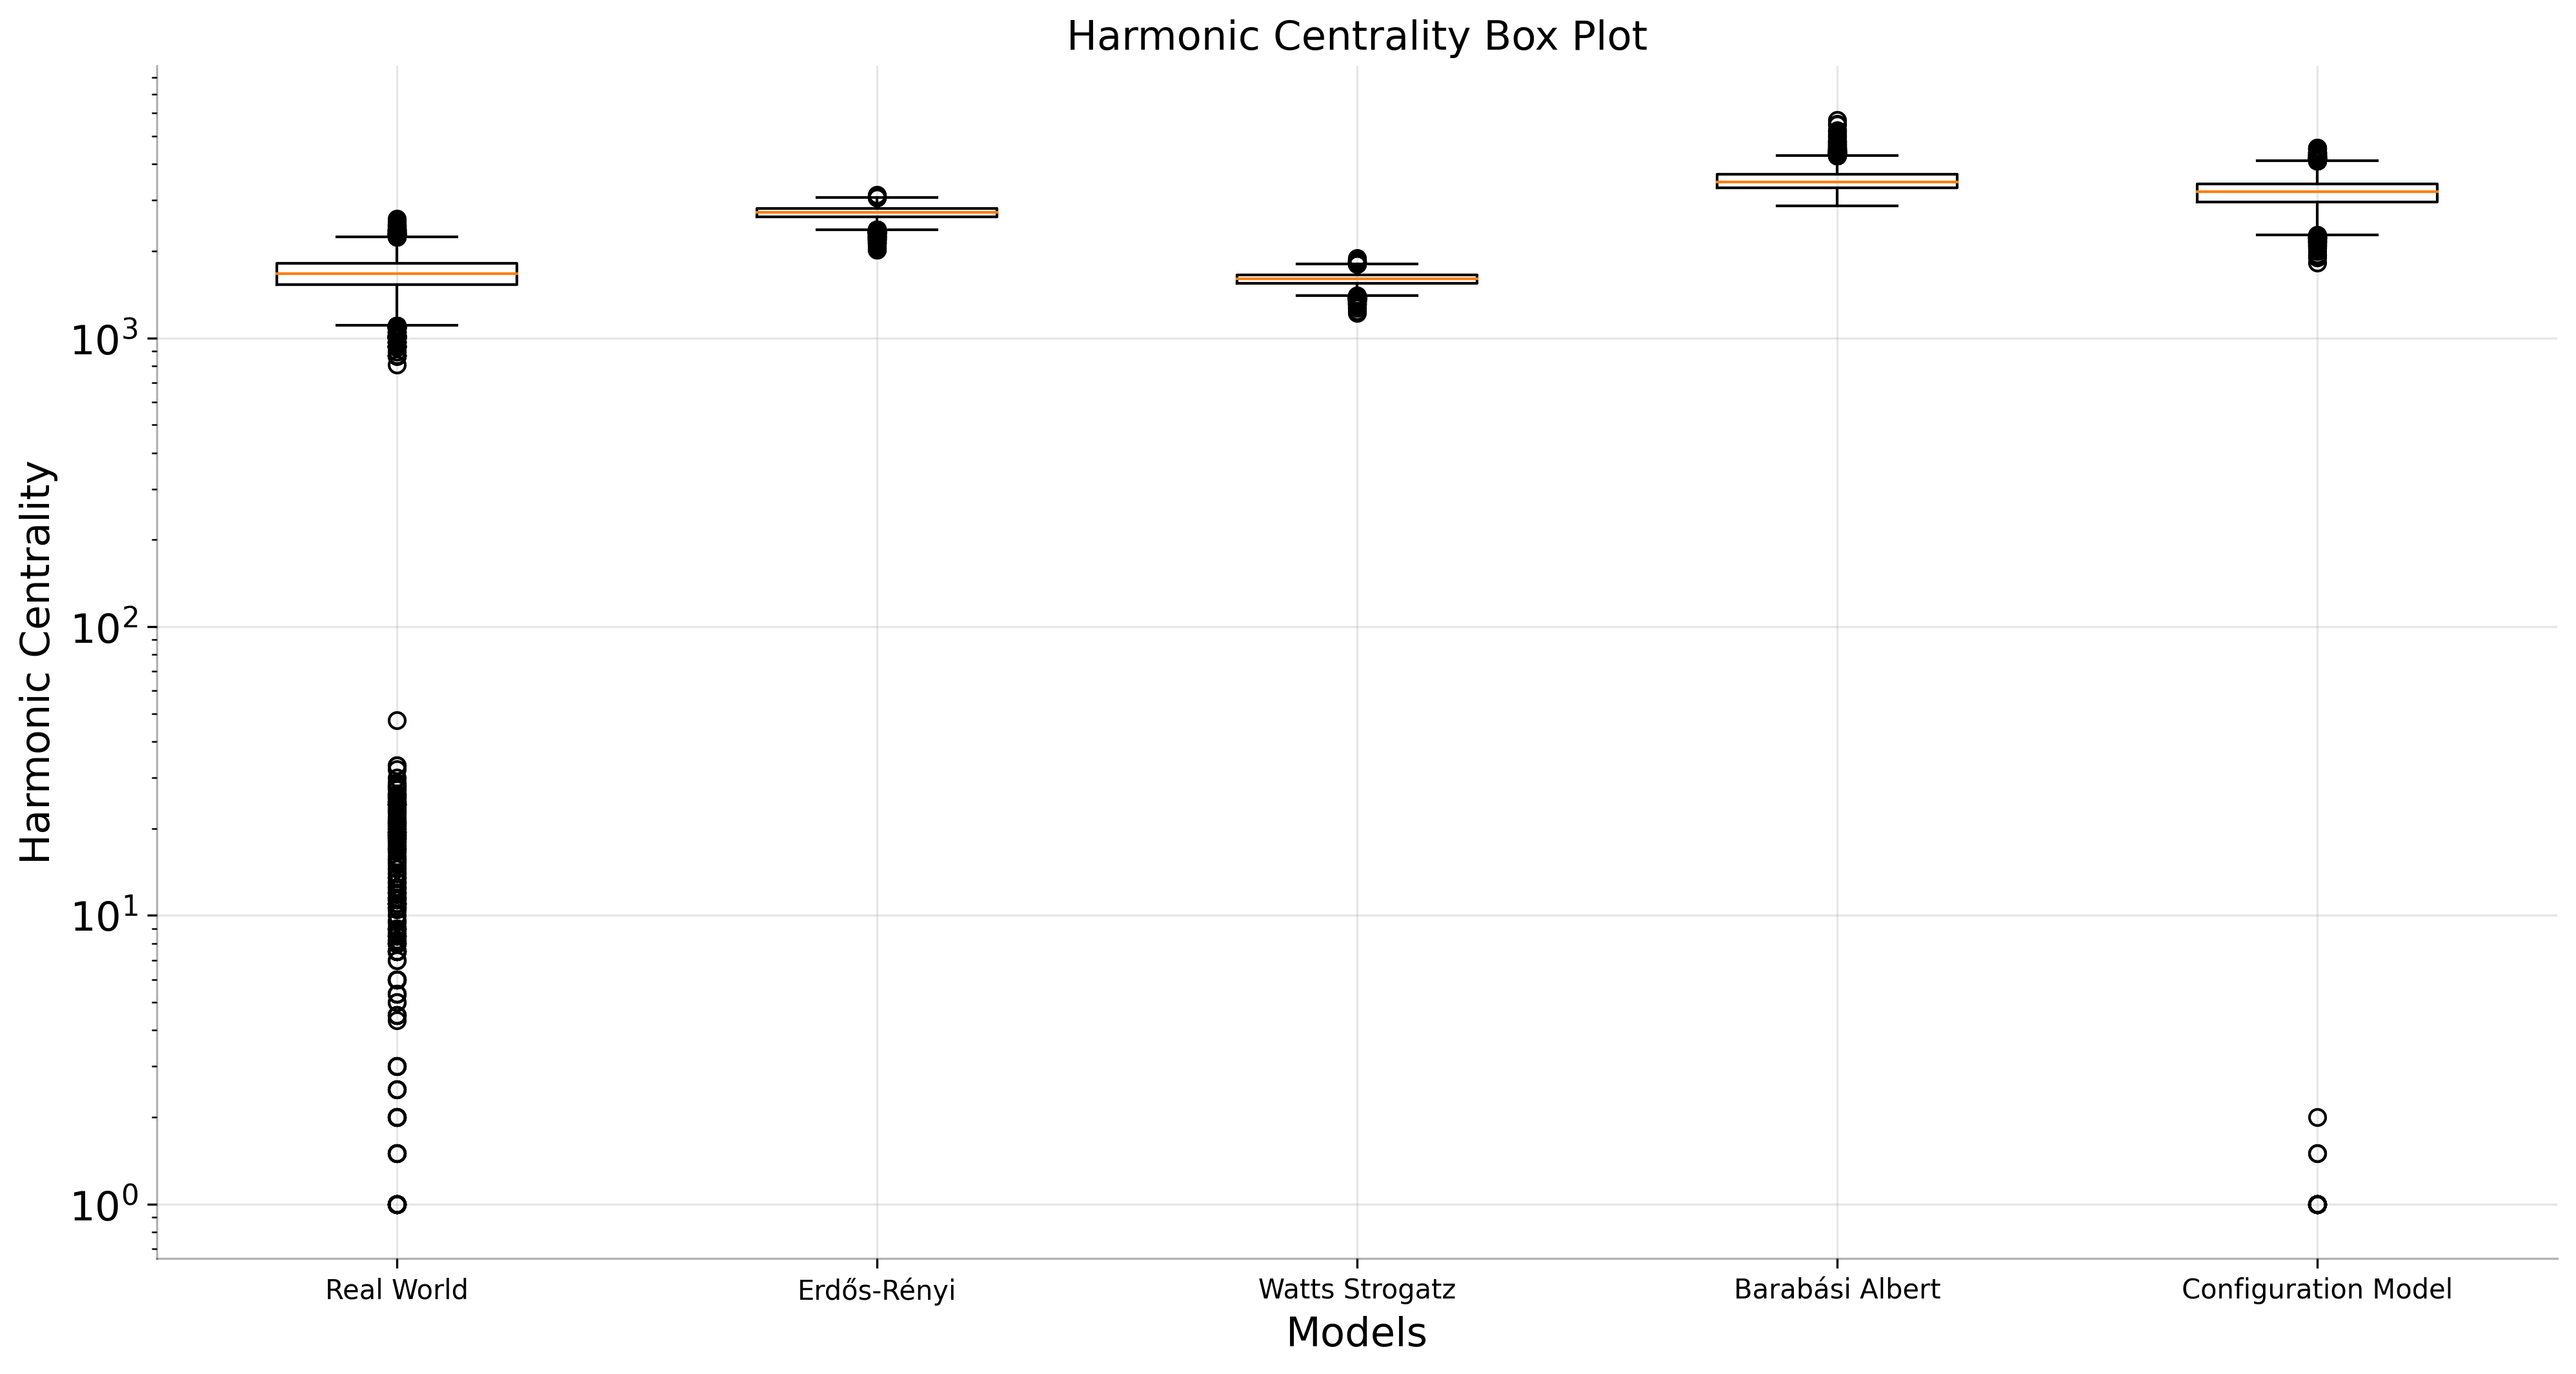

In [ ]:
box_plot(harmonic_data, "Harmonic Centrality")

/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_265/3661112406.py:9

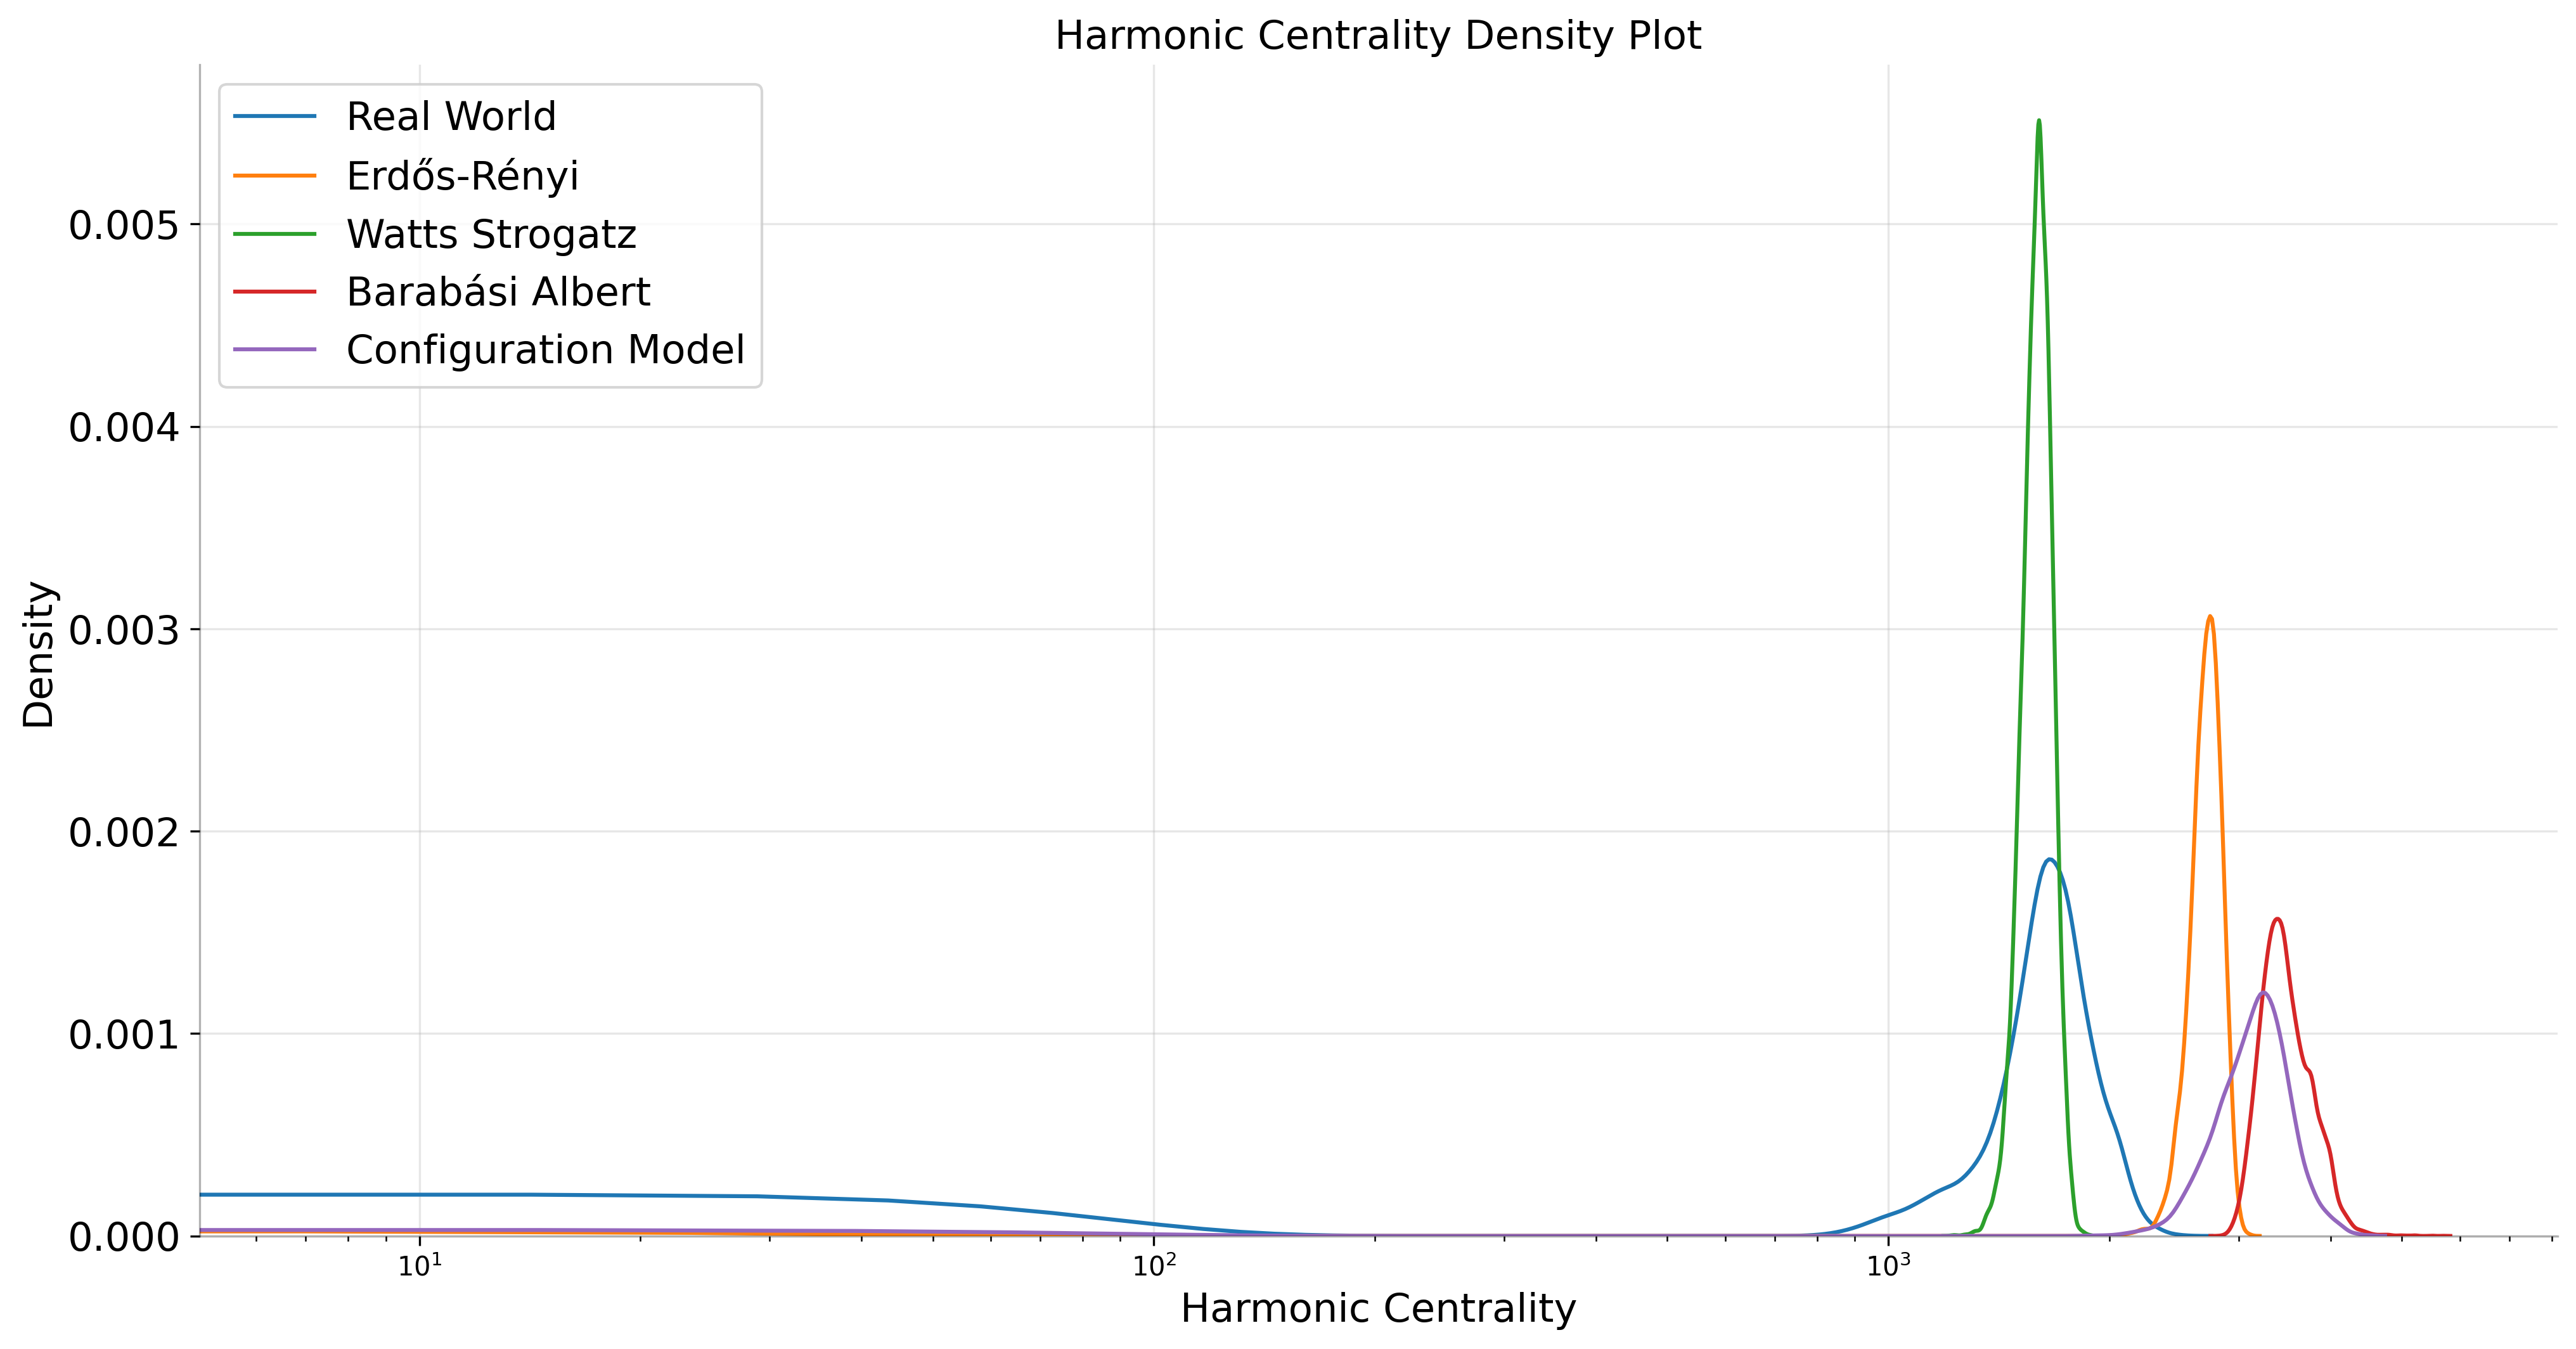

In [ ]:
dist_plot(harmonic_data, "Harmonic Centrality")

/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)


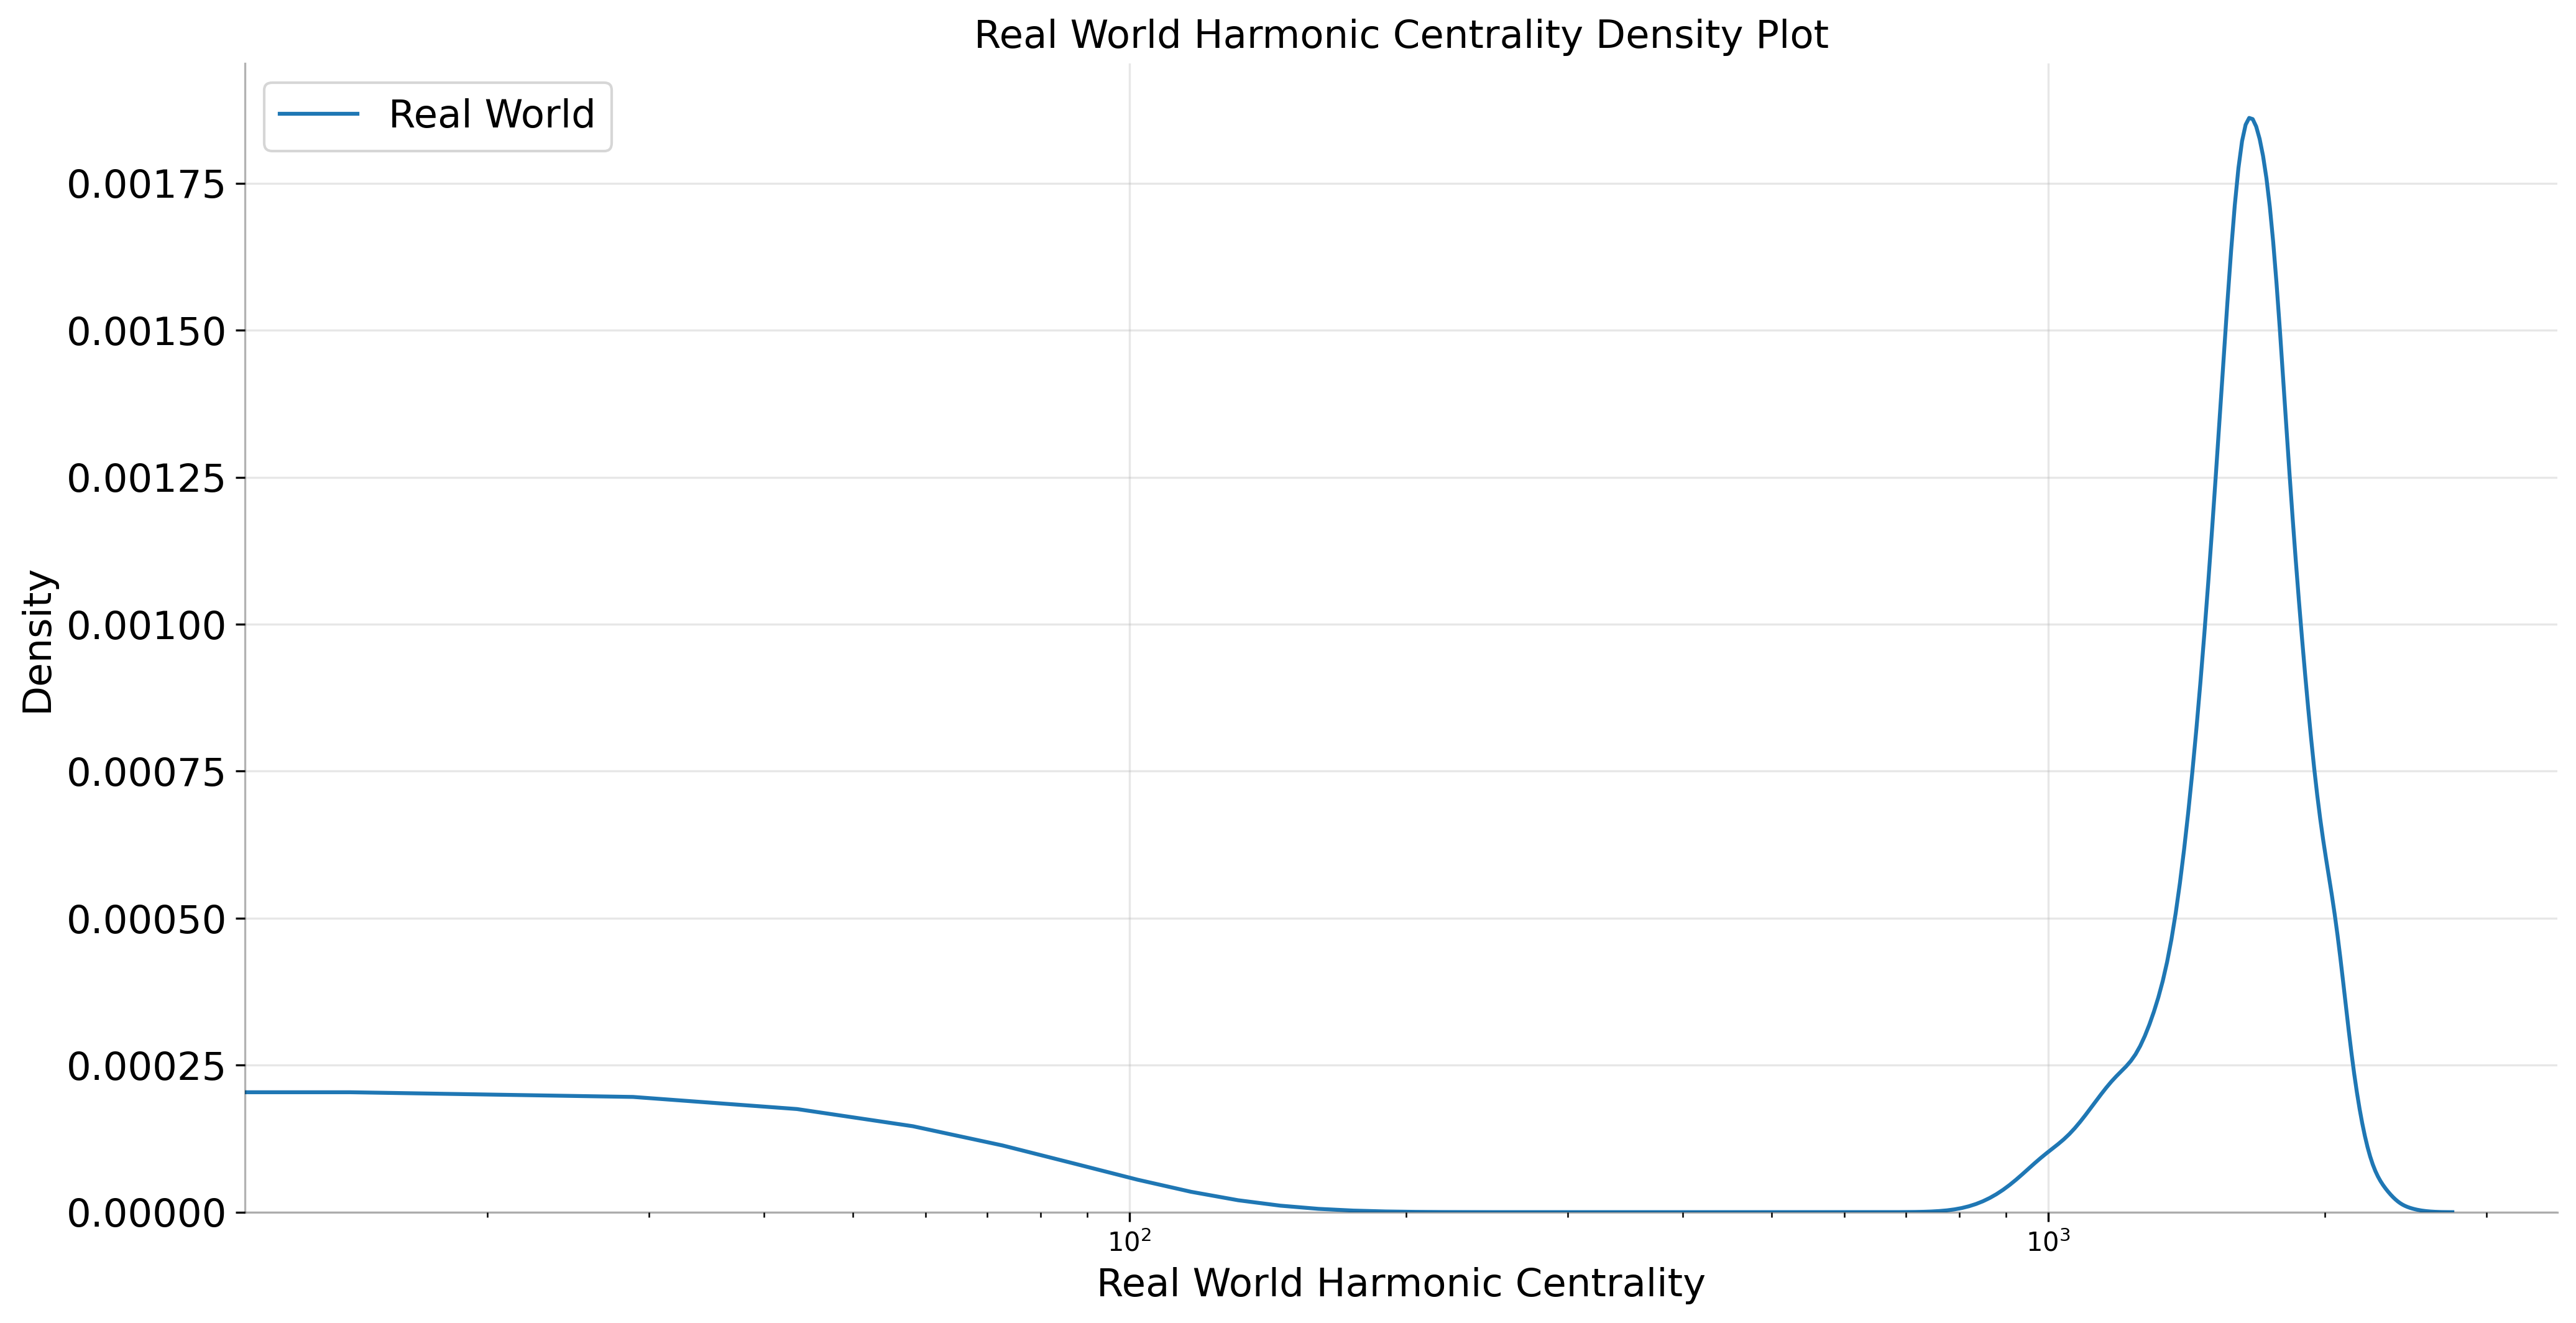

In [ ]:
dist_plot(real_world_harmonic_data, "Real World Harmonic Centrality")

### Betweenness Centrality

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False)

In [ ]:
betweenness_centrality = {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
dict(itertools.islice(betweenness_centrality.items(), 10))#Top Ten

{'CHEN WEI': 18825760.109720226,
 'GUO XIN': 18073959.352737576,
 'TAKANO HIROAKI': 17731362.945835635,
 'KOBAYASHI MASAHARU': 14037880.91803344,
 'SAKODA KAZUYUKI': 8663808.919481484,
 'HWANG SUNG-HEE': 7421528.59488891,
 'SAKO YOICHIRO': 7106151.468900681,
 'CLEVENGER LAWRENCE A': 5513142.336465155,
 'TAKAHASHI KOJI': 5169331.765693823,
 'WANG WEI': 5116723.150233187}

In [ ]:
save(betweenness_centrality ,"betweenness_centrality.json")

In [ ]:
betweenness_centrality = load("betweenness_centrality.json")
betweenness_list = list(betweenness_centrality.values())

In [ ]:
er_betweenness_centrality = nx.betweenness_centrality(er, normalized=False)
er_betweenness_centrality = {k: v for k, v in sorted(er_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
er_betweenness_list = list(er_betweenness_centrality.values())
save(er_betweenness_centrality ,"er_betweenness_centrality.json")

In [ ]:
er_betweenness_centrality = load("er_betweenness_centrality.json")
er_betweenness_list = list(er_betweenness_centrality.values())

In [ ]:
ws_betweenness_centrality = nx.betweenness_centrality(ws, normalized=False)
ws_betweenness_centrality = {k: v for k, v in sorted(ws_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
ws_betweenness_list = list(ws_betweenness_centrality.values())
save(ws_betweenness_centrality ,"ws_betweenness_centrality.json")

In [ ]:
ws_betweenness_centrality = load("ws_betweenness_centrality.json")
ws_betweenness_list = list(ws_betweenness_centrality.values())

In [ ]:
ba_betweenness_centrality = nx.betweenness_centrality(ba, normalized=False)
ba_betweenness_centrality = {k: v for k, v in sorted(ba_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
ba_betweenness_list = list(ba_betweenness_centrality.values())
save(ba_betweenness_centrality ,"ba_betweenness_centrality.json")

In [ ]:
ba_betweenness_centrality = load("ba_betweenness_centrality.json")
ba_betweenness_list = list(ba_betweenness_centrality.values())

In [ ]:
cm_betweenness_centrality = nx.betweenness_centrality(cm, normalized=False)
cm_betweenness_centrality = {k: v for k, v in sorted(cm_betweenness_centrality.items(), key=lambda item: item[1], reverse=True)}
cm_betweenness_list = list(cm_betweenness_centrality.values())
save(cm_betweenness_centrality ,"cm_betweenness_centrality.json")

In [ ]:
cm_betweenness_centrality = load("cm_betweenness_centrality.json")
cm_betweenness_list = list(cm_betweenness_centrality.values())

In [ ]:
betweenness_data = {
    "real_word":{
        "name":"Real World",
        "list":betweenness_list
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":er_betweenness_list
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":ws_betweenness_list
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":ba_betweenness_list
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":cm_betweenness_list
    }
}
real_world_betweenness_data = {
    "real_word":{
        "name":"Real World",
        "list":betweenness_list
    }
}

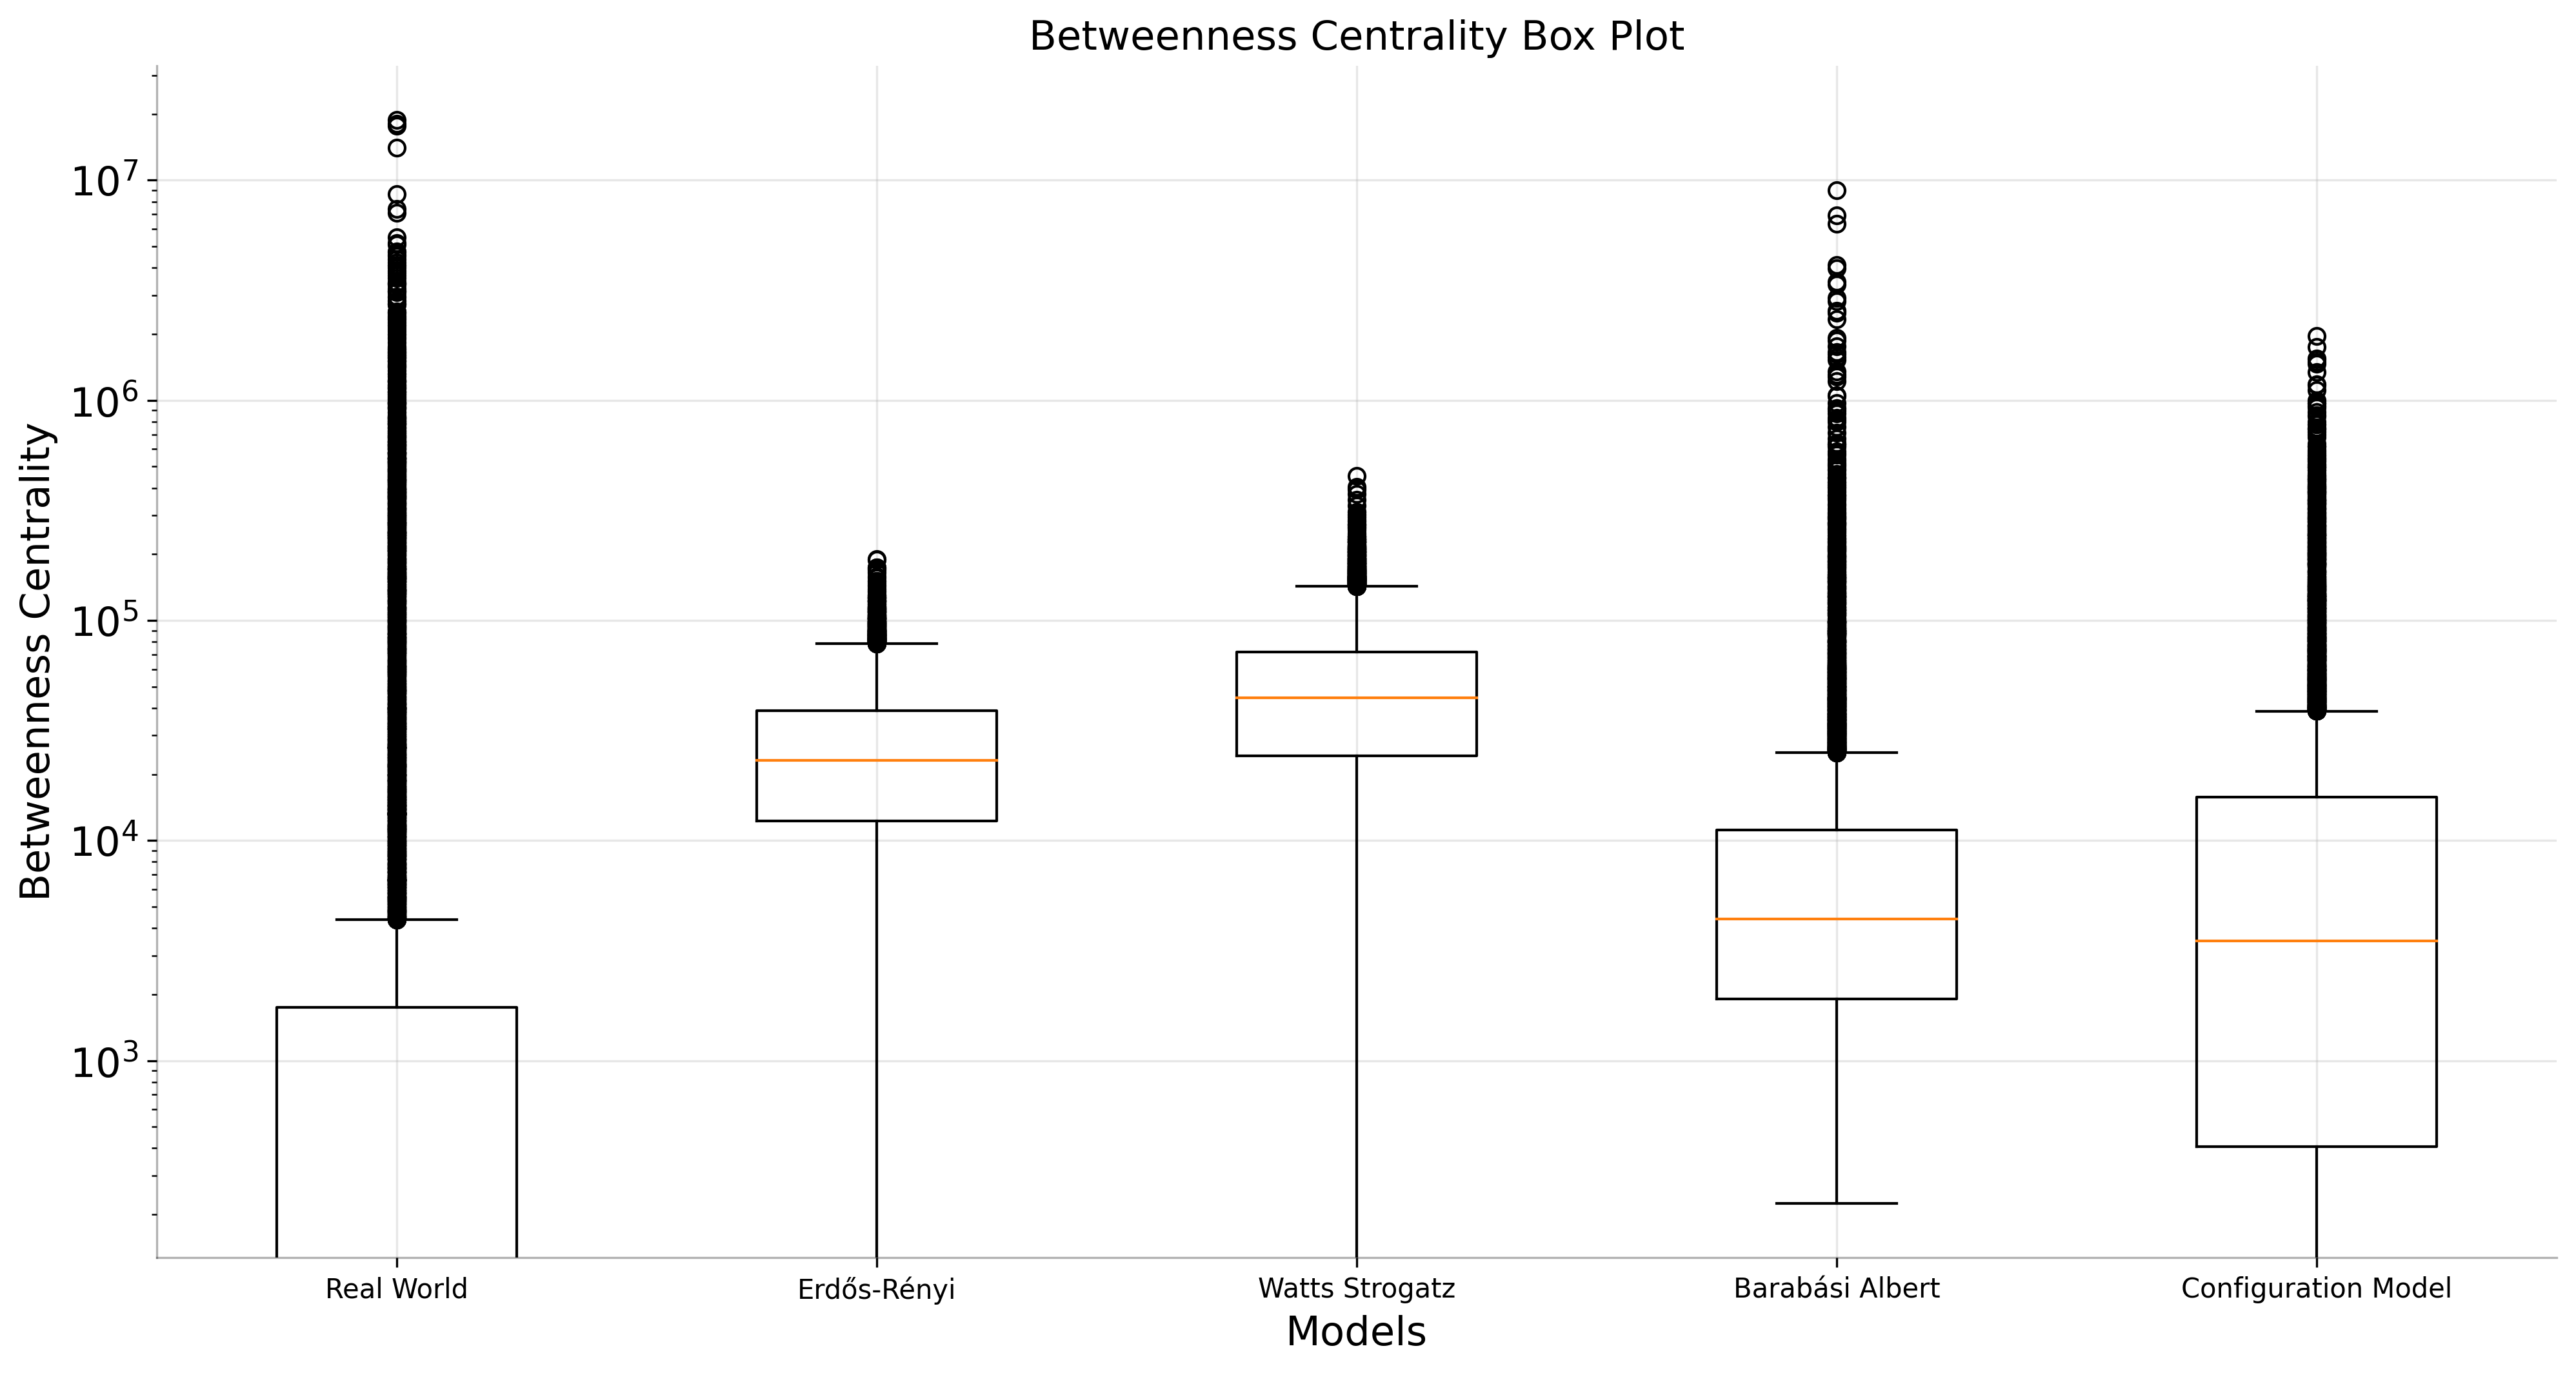

In [ ]:
box_plot(betweenness_data, "Betweenness Centrality")

/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_265/3661112406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["list"], label=v["name"], hist=False)
/tmp/ipykernel_265/3661112406.py:9

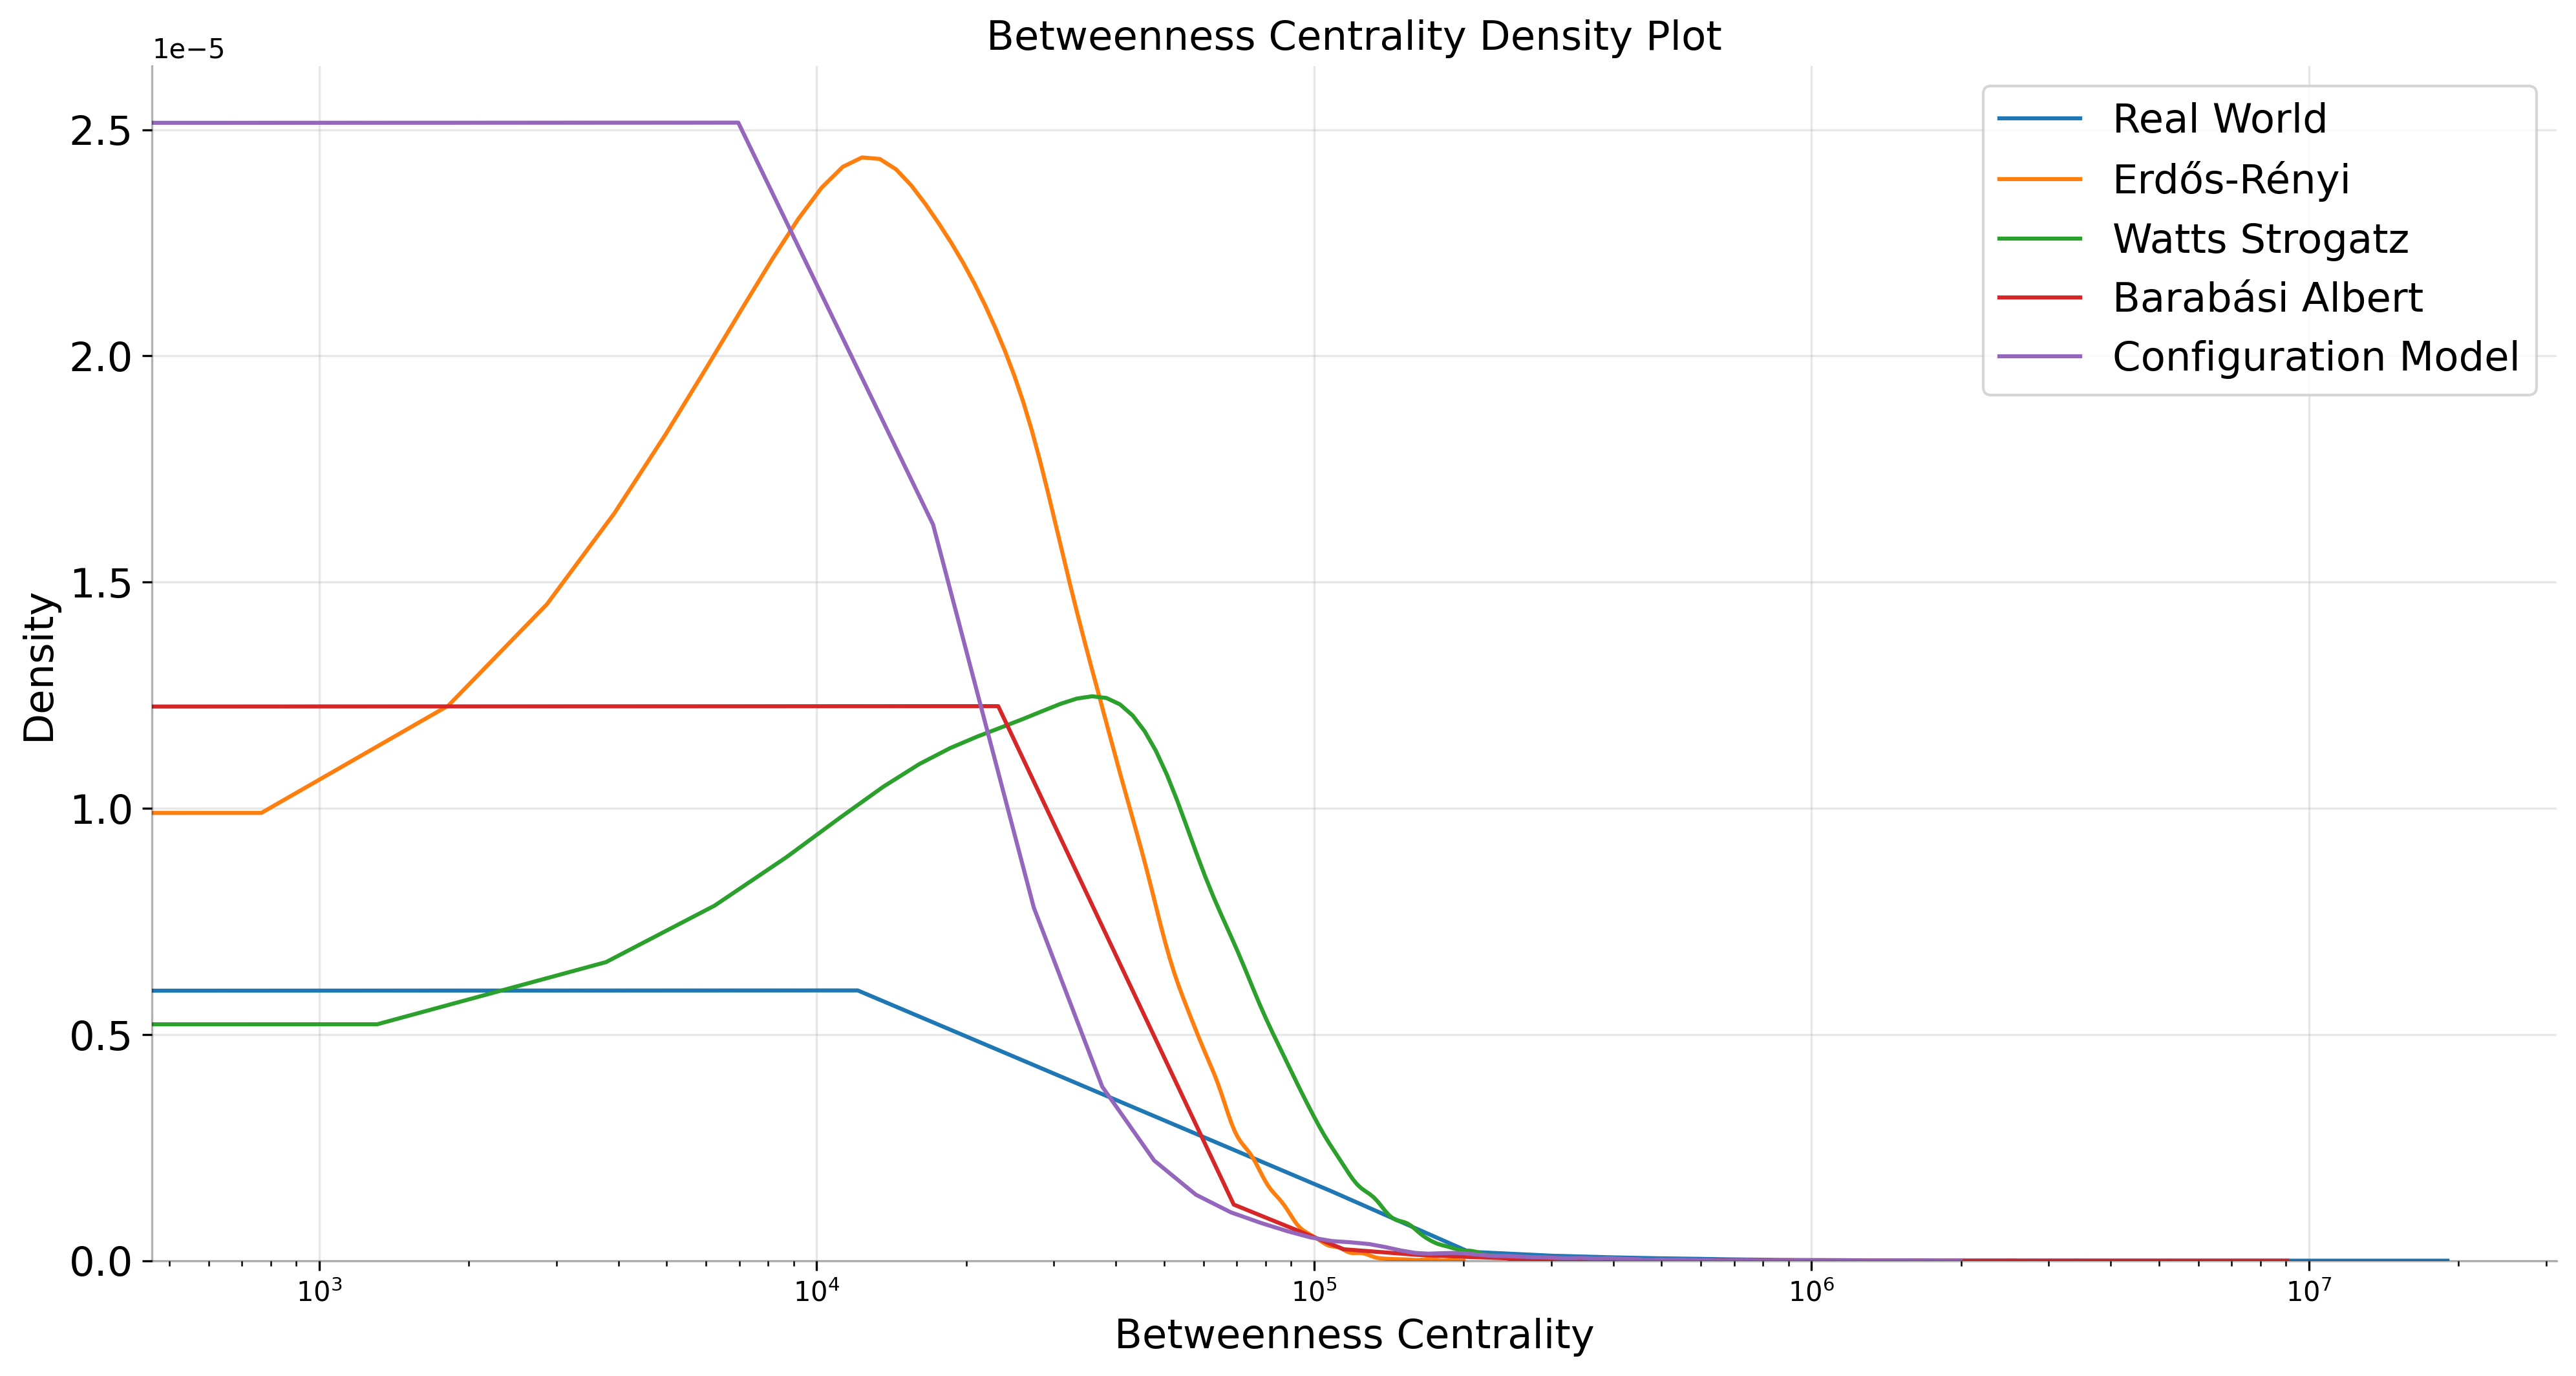

In [ ]:
dist_plot(betweenness_data, "Betweenness Centrality")

In [ ]:
top_ten = list(page_rank_centrality.keys())[0:10]

In [ ]:
page_rank_list = []
eigenvector_list = []
degree_list = []

for i in top_ten:
    page_rank_list.append(page_rank_centrality[i])
    eigenvector_list.append(eigenvector_centrality[i])

    for j in degree_sequence:
        if i != j:
            continue
        else:
            degree_list.append(j)

top_ten = top_ten[::-1]  
page_rank_list = page_rank_list[::-1]
degree_list = degree_list[::-1]


In [ ]:
if len(top_ten) == len(page_rank_list) == len(eigenvector_list) == len(degree_list):
    print("Tutte le liste hanno la stessa lunghezza.")
else:
    print("Le liste non hanno la stessa lunghezza.")


Tutte le liste hanno la stessa lunghezza.


In [ ]:
print("Lunghezza di top_ten:", len(top_ten))
print("Lunghezza di page_rank_list:", len(page_rank_list))
print("Lunghezza di eigenvector_list:", len(eigenvector_list))
print("Lunghezza di degree_list:", len(degree_list))



Lunghezza di top_ten: 10
Lunghezza di page_rank_list: 10
Lunghezza di eigenvector_list: 10
Lunghezza di degree_list: 10


In [ ]:

print(eigenvector_list)



[0.003949289222622265, 4.397953096593431e-05, 0.003200455514207535, 2.2130893401521e-06, 5.351164469889542e-07, 1.478488146795225e-06, 1.163377339236832e-08, 0.076619540883642, 2.820465005053628e-07, 1.1786148286461588e-07]


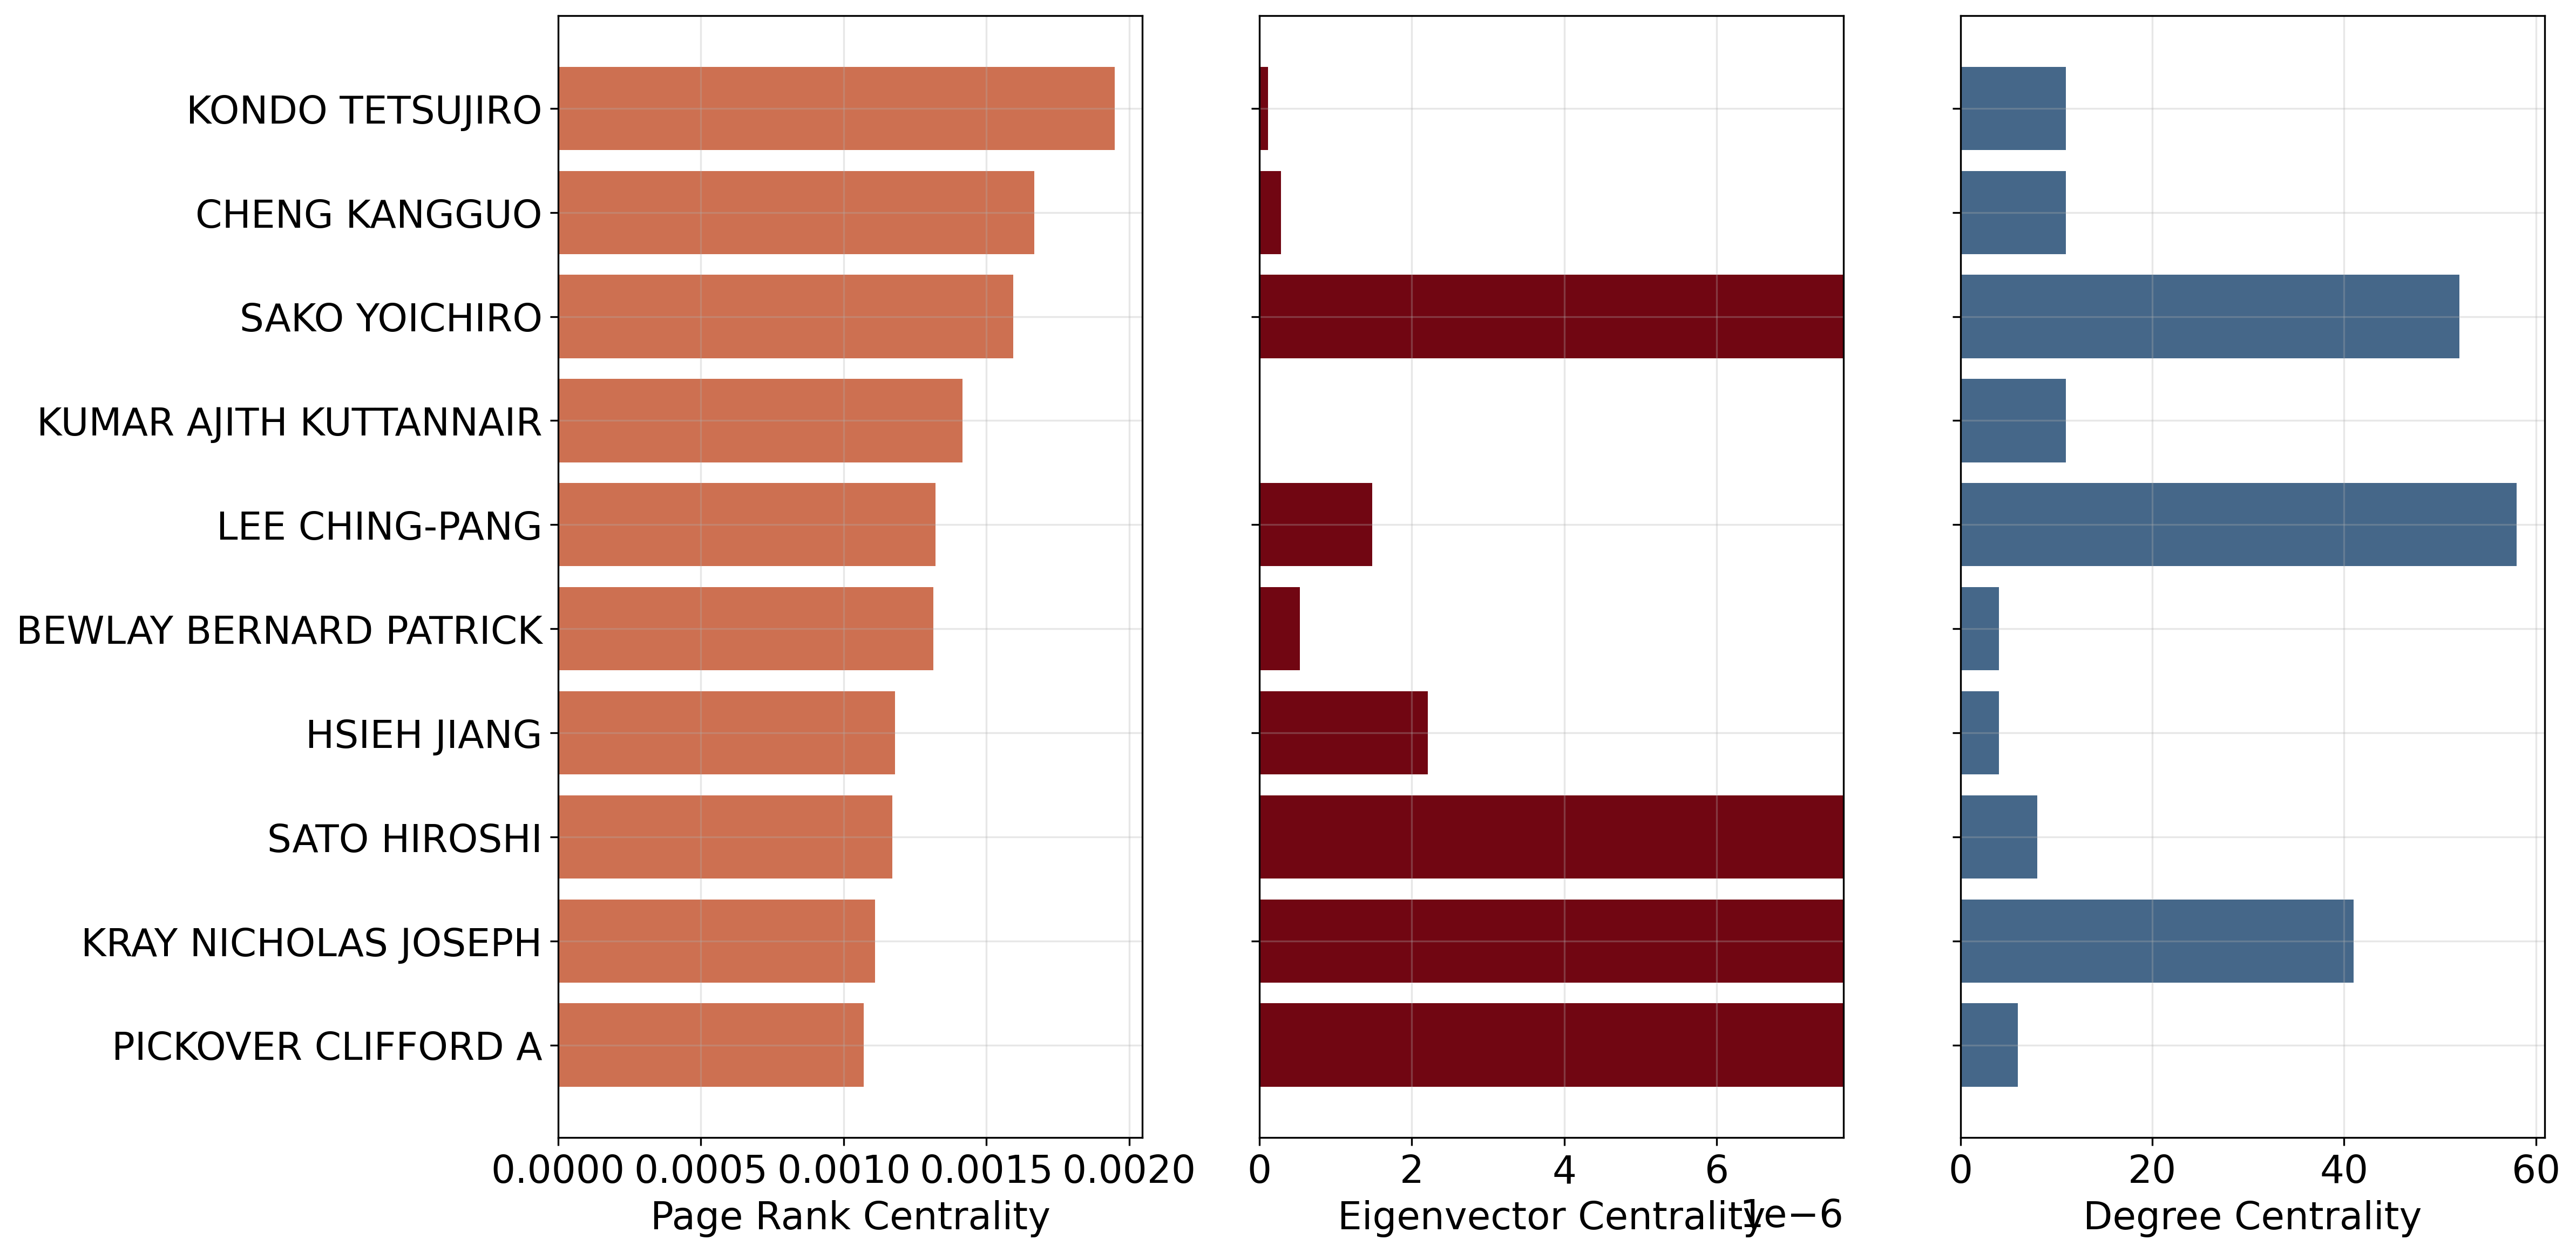

In [ ]:
fig = plt.figure(figsize=(27,9), dpi= 300)
#plt.title("Connectivity-Based and Degree Centrality")

fontsize = 17
plt.rcParams.update({'font.size': fontsize})
ax = fig.add_subplot(151)
plt.barh(top_ten,page_rank_list, color="#CD7051")
plt.grid(axis='both', alpha=.3)
#plt.ylabel(fontsize=fontsize)

plt.xlabel("Page Rank Centrality")

ax2 = fig.add_subplot(152)
y_labels = range(1, 11)  # Etichette numeriche da 1 a 10
plt.barh(y_labels, eigenvector_list, color="#710612")
plt.grid(axis='both', alpha=.3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xlabel("Eigenvector Centrality")
plt.xlim(0, max(eigenvector_list) * 0.0001)

ax3 = fig.add_subplot(153)
plt.barh(top_ten,degree_values, color="#456789")
plt.grid(axis='both', alpha=.3)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.xlabel("Degree Centrality")

plt.show()

In [ ]:
top_ten_ = list(closeness_centrality.keys())[0:10]

In [ ]:
closeness_list = []
harmonic_list = []
betweenness_list = []
for i in top_ten_:
    closeness_list.append(closeness_centrality[i])
    harmonic_list.append(harmonic_centrality[i])
    betweenness_list.append(betweenness_centrality[i])
top_ten_ = top_ten_[::-1]
closeness_list = closeness_list[::-1]
harmonic_list = harmonic_list[::-1]
betweenness_list = betweenness_list[::-1]

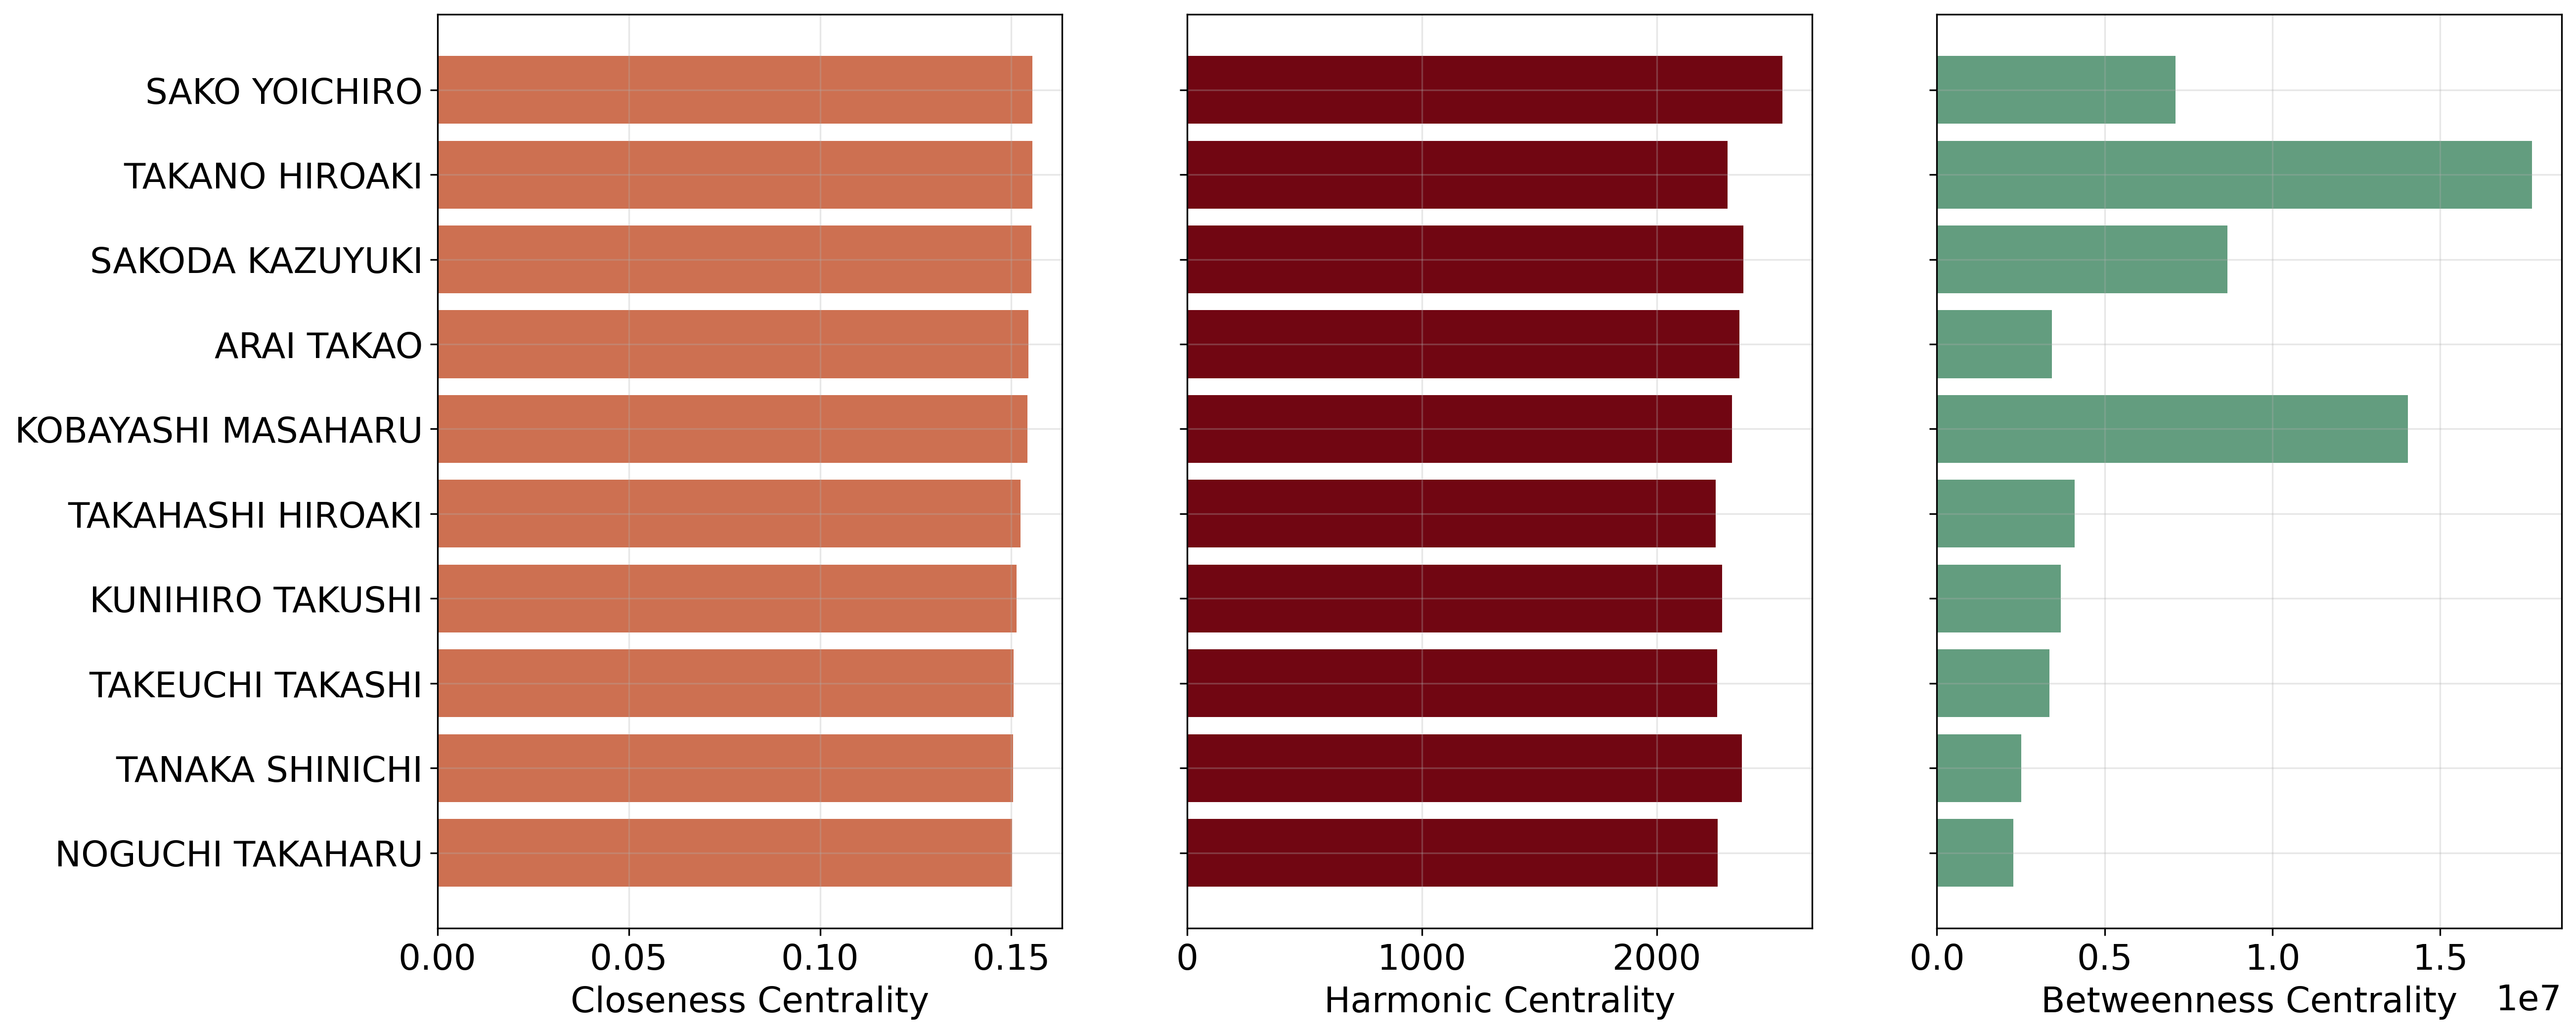

In [ ]:
fig = plt.figure(figsize=(25,8), dpi= 300)

fontsize = 17
plt.rcParams.update({'font.size': fontsize})
ax = fig.add_subplot(141)
plt.barh(top_ten_,closeness_list, color="#CD7051")
plt.grid(axis='both', alpha=.3)
#plt.ylabel(fontsize=fontsize)

plt.xlabel("Closeness Centrality")

ax2 = fig.add_subplot(142)
plt.barh(top_ten_,harmonic_list, color="#710612")
plt.grid(axis='both', alpha=.3)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xlabel("Harmonic Centrality")


ax3 = fig.add_subplot(143)
plt.barh(top_ten_,betweenness_list, color='#639D7F')
plt.grid(axis='both', alpha=.3)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.xlabel("Betweenness Centrality")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba1d0b84-8b74-40fa-8475-876b80bfb255' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>